# About the Dataset

In [1]:
'''
Data source: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition
There are 1470 records in the data, each with 35 attributes, including 34 feature attributes and 
one target attribute. Attrition is the target attribute and has the values "Yes" and "No," based on 
other dependent attributes. 
'''

'\nData source: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition\nThere are 1470 records in the data, each with 35 attributes, including 34 feature attributes and \none target attribute. Attrition is the target attribute and has the values "Yes" and "No," based on \nother dependent attributes. \n'

In [2]:
#Importing the necessary libraries and modules.
import pandas as pd                 #For importing and doing data-preprocessing and transformations
import numpy as np                  #Allows us to create and manage the arrays used by our models
import matplotlib.pyplot as plt     #Allows us to plot charts and graphs
import seaborn as sns               #Allows us to plot graphs and charts
import tensorflow as tf             #For Artificial Neural Networks
import warnings
warnings.filterwarnings('ignore')


# Data Extraction and Exploratory Data Analysis on the dataset

In [3]:
'''
Reading the dataset selected into a pandas dataframe using pandas library. Since, this is a CSV file, 
we use the read_csv on from pandas object, from its library
'''

eda_df = pd.read_csv(r"C:\Users\cvvis\OneDrive\Desktop\Our DataMining Project\HR Employee Attrition.csv")

In [4]:
#Checking the number of rows and columns in our dataset
eda_df.shape

#We understand that there are 1470 rows and 35 columns from the output below
#rows = 1470
#columns = 35

(1470, 35)

In [5]:
#Checking some brief information about the schema

'''
We observe that a few columns here have missing values, since the count of total number of values in each column is not 
equal to the total number of rows. 
'''

'''
We can see that the columns are either Integer type or Object type. Object type in pandas is like String.
'''

eda_df.info(verbose=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1467 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1466 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [6]:
#Checking the first few rows to get a glimpse of how the data is
pd.set_option('display.max_columns', None)
eda_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11.0,3,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,NaN,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23.0,4,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15.0,3,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,NaN,23159,1,Y,Yes,11.0,3,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,NaN,3,4,80,1,6,3,3,2,2,2,2


In [7]:
#Doing a describe on the dataset to see how the statistical measures are.
'''
We can get the common statistical measures like count, mean, min, max, std etc.. using the describe method. But note that 
this gives the results only to the numerical columns or the columns that are Integer or Floating datatype values.
'''

eda_df.describe()



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1467.000000,1466.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1465.000000,1470.000000,1470.000000,1457.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.981595,803.036835,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6515.033447,14310.174150,2.693197,15.509266,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.210236,403.611860,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4711.416449,7122.791453,2.498009,5.593494,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.250000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2926.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.750000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8381.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,70.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,99.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#To describe the statistical analysis for the columns of the dataframe that are objects
'''
Here, we get the common statistics such as Unique, top etc... for columns in our Dataframe that are objects. We can see that
the Attrition column has two unique values, and the same applies with the Gender column. The Department, Marital status and
Business Travel have 3 unique values respectively.
'''

eda_df.describe(include = object)



,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [9]:
#To get the column wise memory consumption and usage for the dataframe
eda_df.memory_usage()

Index                         128
Age                         11760
Attrition                   11760
BusinessTravel              11760
DailyRate                   11760
Department                  11760
DistanceFromHome            11760
Education                   11760
EducationField              11760
EmployeeCount               11760
EmployeeNumber              11760
EnvironmentSatisfaction     11760
Gender                      11760
HourlyRate                  11760
JobInvolvement              11760
JobLevel                    11760
JobRole                     11760
JobSatisfaction             11760
MaritalStatus               11760
MonthlyIncome               11760
MonthlyRate                 11760
NumCompaniesWorked          11760
Over18                      11760
OverTime                    11760
PercentSalaryHike           11760
PerformanceRating           11760
RelationshipSatisfaction    11760
StandardHours               11760
StockOptionLevel            11760
TotalWorkingYe

In [10]:
'''
Classification of columns as Quantitative - Discrete/Continuous, Qualitative - Categorical and Ordinal.

Qualitative:
Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


Quantitative:
Age
DailyRate
DistanceFromHome
Education
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
'''



'\nClassification of columns as Quantitative - Discrete/Continuous, Qualitative - Categorical and Ordinal.\n\nQualitative:\nAttrition\nBusinessTravel\nDepartment\nEducationField\nGender\nJobRole\nMaritalStatus\nOver18\nOverTime\n\n\nQuantitative:\nAge\nDailyRate\nDistanceFromHome\nEducation\nEmployeeCount\nEmployeeNumber\nEnvironmentSatisfaction\nHourlyRate\nJobInvolvement\nJobLevel\nJobSatisfaction\nMonthlyIncome\nMonthlyRate\nNumCompaniesWorked\nPercentSalaryHike\nPerformanceRating\nRelationshipSatisfaction\nStandardHours\nStockOptionLevel\nTotalWorkingYears\nTrainingTimesLastYear\nWorkLifeBalance\nYearsAtCompany\nYearsInCurrentRole\nYearsSinceLastPromotion\nYearsWithCurrManager\n'

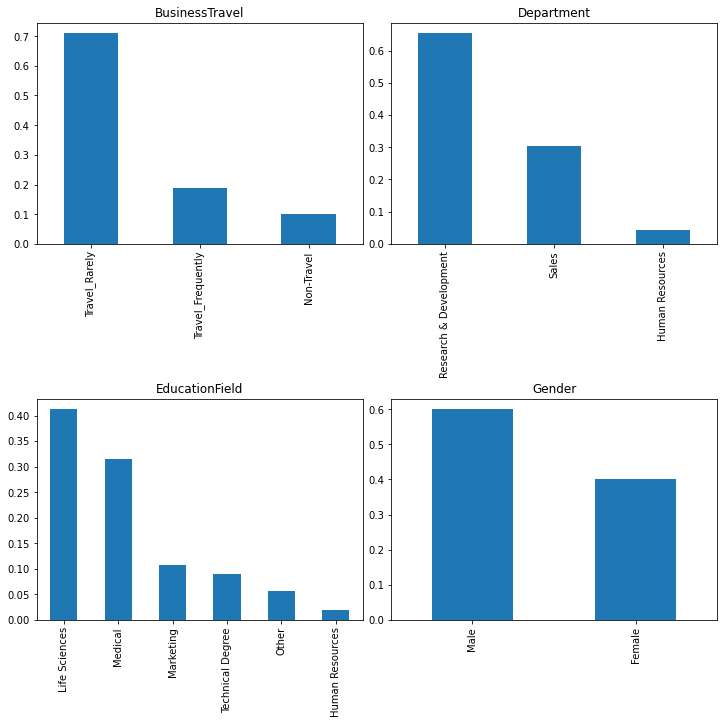

In [11]:
'''
Performing Univariate analysis on the Qualitative columns
'''


plt.subplot(221)
eda_df.BusinessTravel.value_counts(normalize = True).plot(kind = 'bar', title = "BusinessTravel", figsize = (10, 10))
plt.tight_layout(pad = 0.5)

plt.subplot(222)
eda_df.Department.value_counts(normalize = True).plot(kind = 'bar', title = "Department")
plt.tight_layout(pad = 0.5)

plt.subplot(223)
eda_df.EducationField.value_counts(normalize = True).plot(kind = 'bar', title = "EducationField")
plt.tight_layout(pad = 0.5)


'''
We see the Male to Female ratio of employees is 60 to 40.
'''
plt.subplot(224)
eda_df.Gender.value_counts(normalize = True).plot(kind = 'bar', title = "Gender")
plt.tight_layout(pad = 0.5)


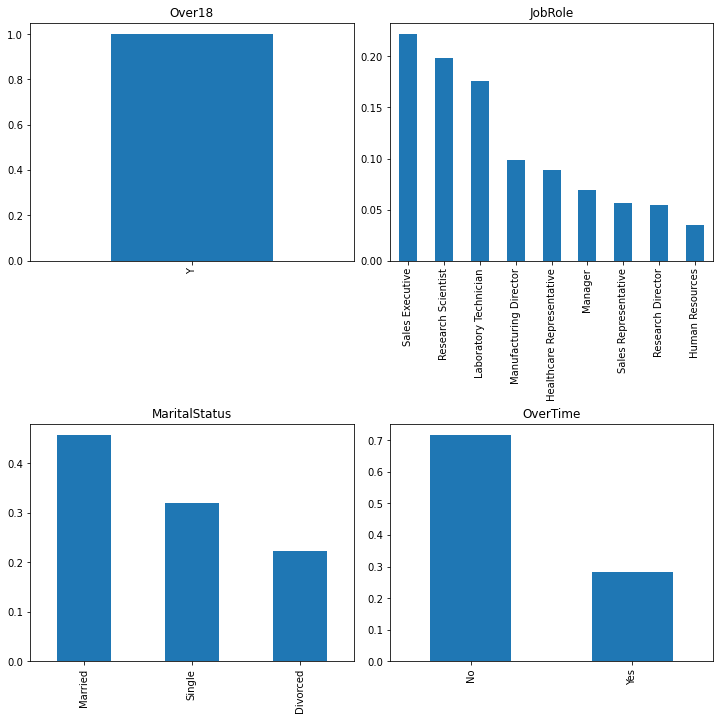

In [12]:
'''
We notice that every employee here is Over 18 years of age. Hence this column is of no contribution to the dependent target 
variable prediction.
'''


plt.subplot(221)
eda_df.Over18.value_counts(normalize = True).plot(kind = 'bar', title = "Over18", figsize=(10, 10))
plt.tight_layout(pad = 0.7)

plt.subplot(222)
eda_df.JobRole.value_counts(normalize = True).plot(kind = 'bar', title = "JobRole", figsize=(10, 10))
plt.tight_layout(pad = 0.7)

'''
From the distribution, we see that around 50% are married, 30% are unmarried and the rest 20% are divorced.
'''
plt.subplot(223)
eda_df.MaritalStatus.value_counts(normalize = True).plot(kind = 'bar', title = "MaritalStatus", figsize=(10, 10))
plt.tight_layout(pad = 0.7)


'''
We notice that about 70% employees work overtime.
'''
plt.subplot(224)
eda_df.OverTime.value_counts(normalize = True).plot(kind = 'bar', title = "OverTime", figsize=(10, 10))
plt.tight_layout(pad = 0.7)

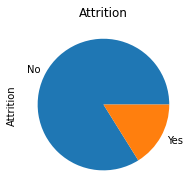

In [13]:
'''
From the target value distribution, we see that more than 3/4th of employees are in the same company.
'''
plt.subplot(221)
eda_df.Attrition.value_counts(normalize = True).plot(kind = 'pie', title = "Attrition", figsize=(5, 5))
plt.tight_layout(pad = 0.5)

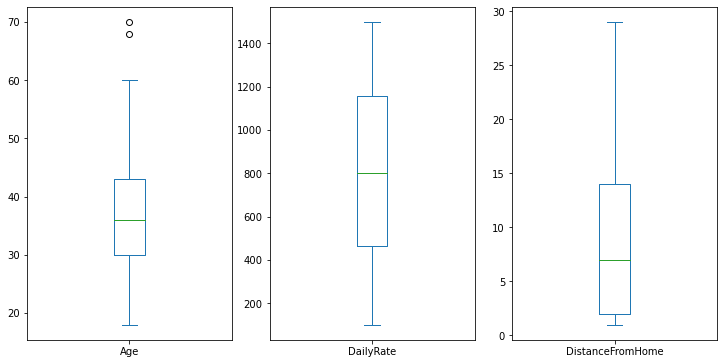

In [14]:
'''
Performing Univariate analysis on a few Quantitative columns. We will use Box plots here, since they provide better 
information and help us find the outliers.
'''

'''
We see a couple of outliers in the age where the age of employees is close to 70.
'''
plt.subplot(131)
eda_df.Age.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.DailyRate.plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
eda_df.DistanceFromHome.plot.box()
plt.tight_layout(pad=0.5)



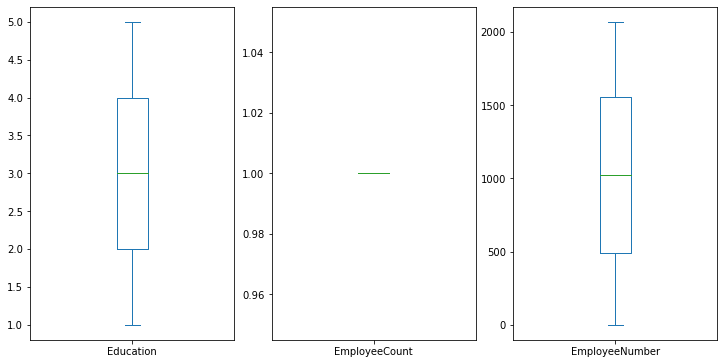

In [15]:
plt.subplot(131)
eda_df.Education.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.EmployeeCount.plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
eda_df.EmployeeNumber.plot.box()
plt.tight_layout(pad=0.5)

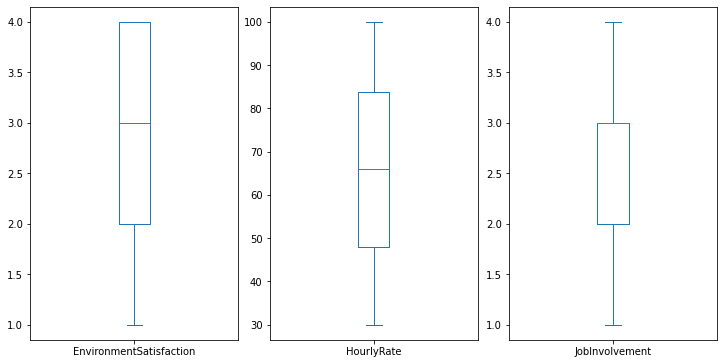

In [16]:
plt.subplot(131)
eda_df.EnvironmentSatisfaction.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.HourlyRate.plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
eda_df.JobInvolvement.plot.box()
plt.tight_layout(pad=0.5)

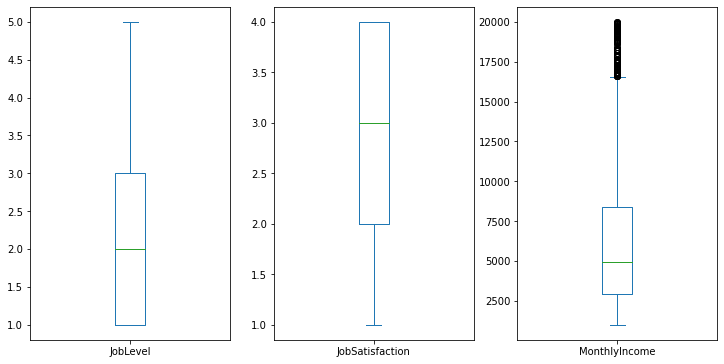

In [17]:

plt.subplot(131)
eda_df.JobLevel.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.JobSatisfaction.plot.box()
plt.tight_layout(pad=0.5)

'''
There are a few employees whose monthly salary is extremely high and not in the mean salary range.
'''
plt.subplot(133)
eda_df.MonthlyIncome.plot.box()
plt.tight_layout(pad=0.5)

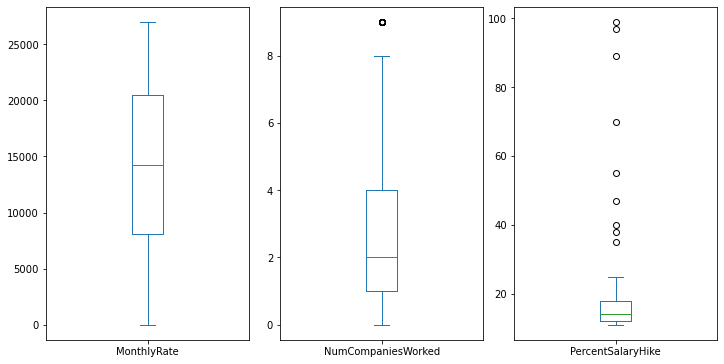

In [18]:
plt.subplot(131)
eda_df.MonthlyRate.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.NumCompaniesWorked.plot.box()
plt.tight_layout(pad=0.5)

'''
A few employees received more than 50% percent hike. This shows the performance in the previous year for their company.
'''
plt.subplot(133)
eda_df.PercentSalaryHike.plot.box()
plt.tight_layout(pad=0.5)

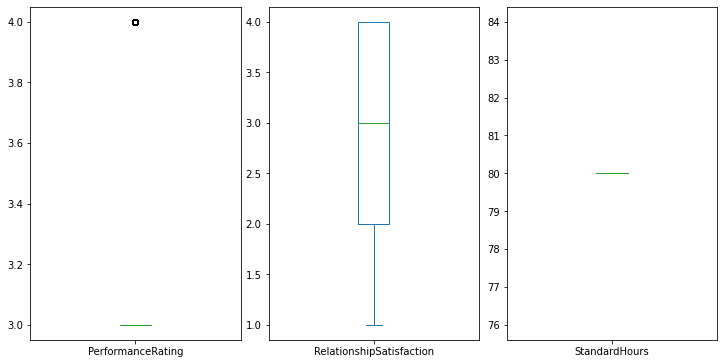

In [19]:
plt.subplot(131)
eda_df.PerformanceRating.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.RelationshipSatisfaction.plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
eda_df.StandardHours.plot.box()
plt.tight_layout(pad=0.5)

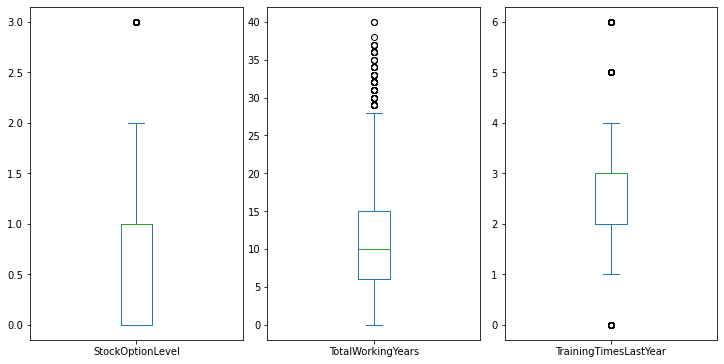

In [20]:
plt.subplot(131)
eda_df.StockOptionLevel.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

'''
A few employees have a total experience of >30 years of age. 
'''
plt.subplot(132)
eda_df.TotalWorkingYears.plot.box()
plt.tight_layout(pad=0.5)

plt.subplot(133)
eda_df.TrainingTimesLastYear.plot.box()
plt.tight_layout(pad=0.5)

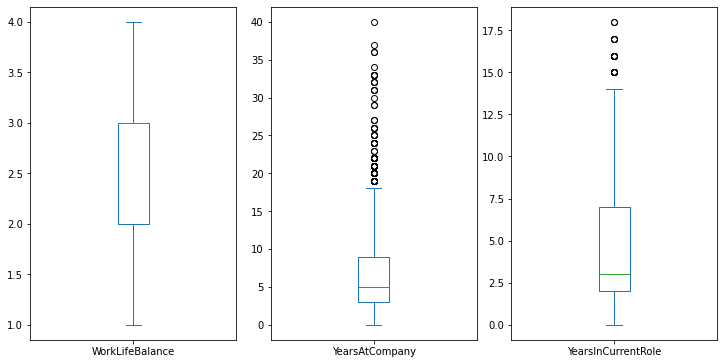

In [21]:
plt.subplot(131)
eda_df.WorkLifeBalance.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

plt.subplot(132)
eda_df.YearsAtCompany.plot.box()
plt.tight_layout(pad=0.5)

'''
There are around 4 employees who have been working for around  15 years in the same role.
'''
plt.subplot(133)
eda_df.YearsInCurrentRole.plot.box()
plt.tight_layout(pad=0.5)

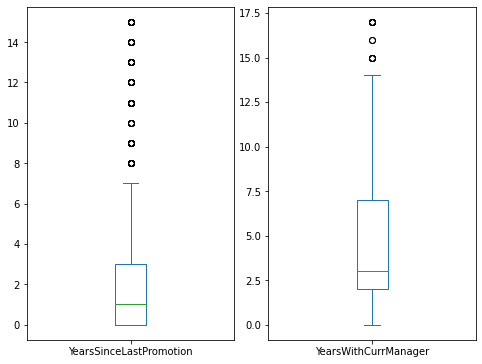

In [22]:
plt.subplot(131)
eda_df.YearsSinceLastPromotion.plot.box(figsize=(10,5))
plt.tight_layout(pad=0.5)

'''
Around 3 employees are under the same manager for more than 15 years.
'''
plt.subplot(132)
eda_df.YearsWithCurrManager.plot.box()
plt.tight_layout(pad=0.5)



<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

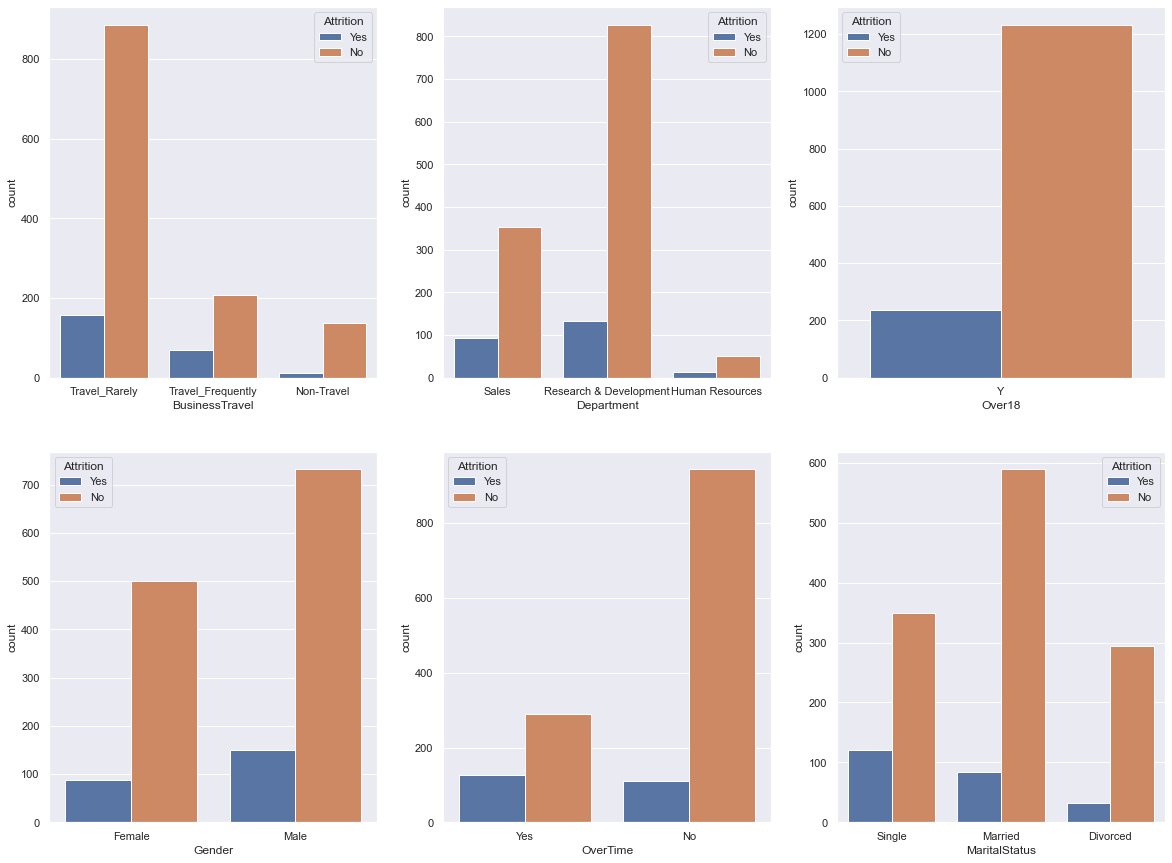

In [23]:
#Performing Bi-variate analysis on some selected features and the target column i.e.Attrition

sns.set(rc={'figure.figsize':(20,15)})
plt.subplot(231)
sns.countplot(x = "BusinessTravel", hue='Attrition', data = eda_df)

plt.subplot(232)
sns.countplot(x = "Department", hue='Attrition', data = eda_df)

plt.subplot(233)
sns.countplot(x = "Over18", hue='Attrition', data = eda_df)

plt.subplot(234)
sns.countplot(x = "Gender", hue='Attrition', data = eda_df)

plt.subplot(235)
sns.countplot(x = "OverTime", hue='Attrition', data = eda_df)

plt.subplot(236)
sns.countplot(x = "MaritalStatus", hue='Attrition', data = eda_df)


<AxesSubplot:xlabel='JobRole', ylabel='count'>

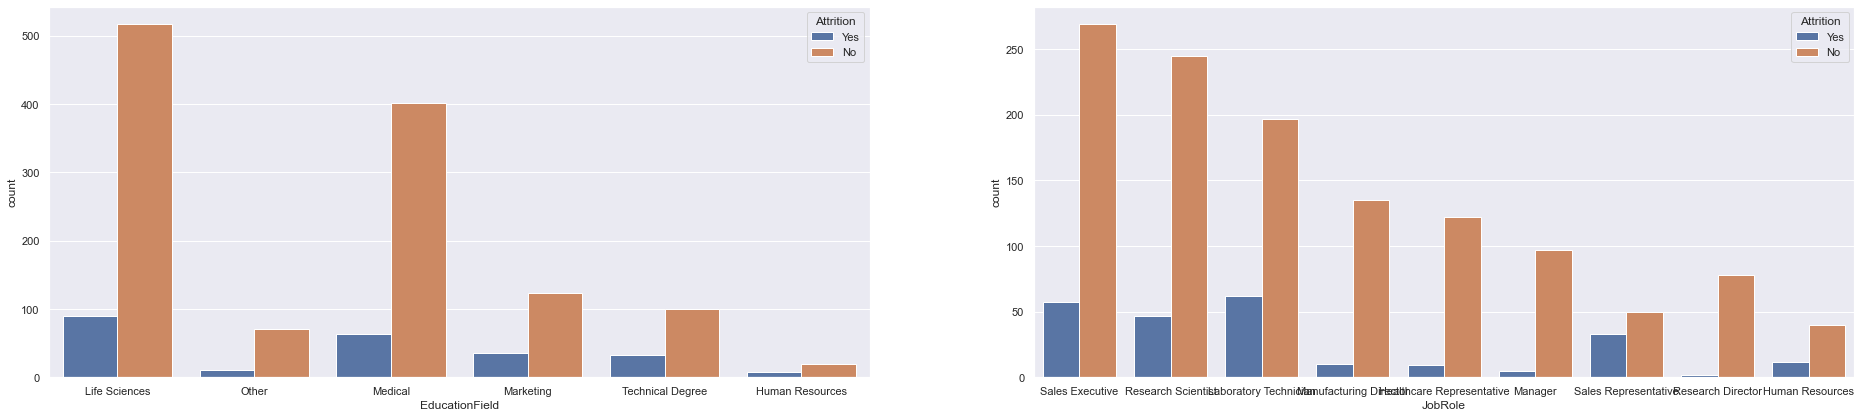

In [24]:
sns.set(rc={'figure.figsize':(50,15)})

plt.subplot(231)
sns.countplot(x = "EducationField", hue='Attrition', data = eda_df)

plt.subplot(232)
sns.countplot(x = "JobRole", hue='Attrition', data = eda_df)

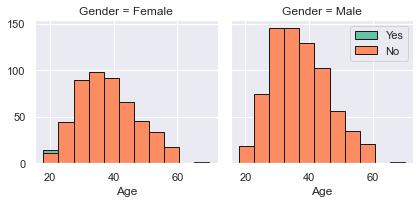

In [25]:
#Performing Multi-variate analysis on some selected features and the target column i.e.Attrition

bins = np.linspace(eda_df.Age.min(), eda_df.Age.max(),12)
graph = sns.FacetGrid(eda_df, col="Gender", hue="Attrition", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'Age', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

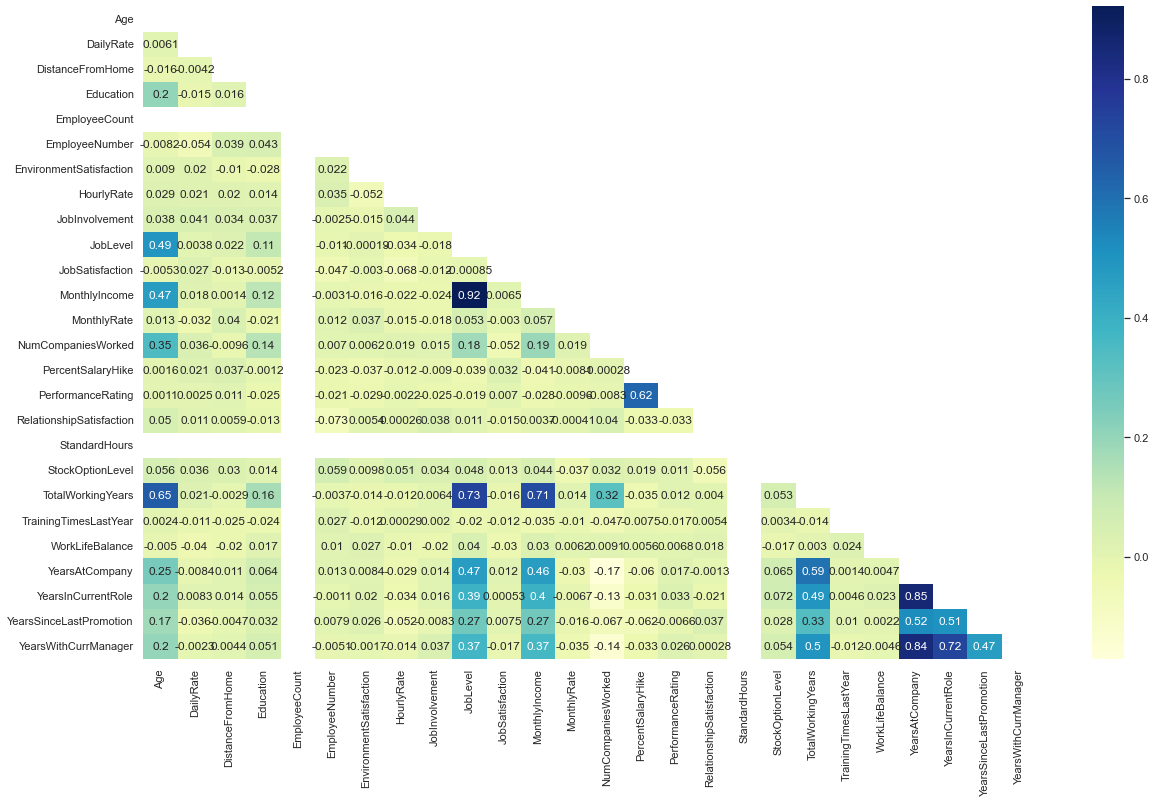

In [26]:
#Correlation 

'''
We find the correlation between the numerical values from the selected dataset. 
Below is the representation of the correlation matrix after eliminating the upper half as they are repetitions.

Here, we are considering the Spearman Rank correlation as it does not assume the data to be normally distributed, unlike
Pearson's correlation.
'''

'''
For example, we see a positive correlation between Monthly income and Job level.
'''
correlation_matrix = eda_df.corr(method="spearman")
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20,12))
    ax = sns.heatmap(correlation_matrix,
mask = mask,annot = True, cmap = "YlGnBu")

In [27]:
eda_df.corr(method="spearman")

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006100,-0.015531,0.203437,NaN,-0.008202,0.008979,0.029170,0.037507,0.492290,-0.005349,0.472785,0.013290,0.347198,0.001584,0.001140,0.050026,NaN,0.055974,0.654771,0.002378,-0.005005,0.252086,0.198456,0.174579,0.196944
DailyRate,0.006100,1.000000,-0.004223,-0.014752,NaN,-0.054498,0.020453,0.020663,0.041386,0.003772,0.027012,0.018142,-0.031721,0.035522,0.020960,0.002504,0.011456,NaN,0.036329,0.021222,-0.010602,-0.039908,-0.008357,0.008342,-0.035929,-0.002273
DistanceFromHome,-0.015531,-0.004223,1.000000,0.015708,NaN,0.038906,-0.010401,0.020446,0.034430,0.022148,-0.013078,0.001434,0.039806,-0.009592,0.037281,0.011320,0.005852,NaN,0.030190,-0.002912,-0.024848,-0.020402,0.010513,0.013708,-0.004685,0.004448
Education,0.203437,-0.014752,0.015708,1.000000,NaN,0.042815,-0.027625,0.014432,0.037231,0.107419,-0.005175,0.119624,-0.021201,0.135103,-0.001177,-0.025081,-0.013173,NaN,0.013794,0.162177,-0.023749,0.017350,0.064196,0.054567,0.032203,0.051292
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.008202,-0.054498,0.038906,0.042815,NaN,1.000000,0.021750,0.034717,-0.002453,-0.011057,-0.047150,-0.003110,0.012311,0.007011,-0.022774,-0.020675,-0.072991,NaN,0.059480,-0.003748,0.026502,0.009994,0.013205,-0.001079,0.007857,-0.005138
EnvironmentSatisfaction,0.008979,0.020453,-0.010401,-0.027625,NaN,0.021750,1.000000,-0.052380,-0.015301,-0.000192,-0.002993,-0.015533,0.037157,0.006151,-0.037435,-0.029160,0.005353,NaN,0.009826,-0.013882,-0.011659,0.027169,0.008425,0.020140,0.026082,-0.001732
HourlyRate,0.029170,0.020663,0.020446,0.014432,NaN,0.034717,-0.052380,1.000000,0.043884,-0.033876,-0.068340,-0.022143,-0.014664,0.019209,-0.011935,-0.002185,0.000259,NaN,0.050543,-0.012072,0.000292,-0.010003,-0.029032,-0.034016,-0.052412,-0.013811
JobInvolvement,0.037507,0.041386,0.034430,0.037231,NaN,-0.002453,-0.015301,0.043884,1.000000,-0.018424,-0.012148,-0.023782,-0.018233,0.015448,-0.008977,-0.024733,0.037857,NaN,0.034464,0.006444,0.002014,-0.019889,0.013836,0.015548,-0.008307,0.037397
JobLevel,0.492290,0.003772,0.022148,0.107419,NaN,-0.011057,-0.000192,-0.033876,-0.018424,1.000000,-0.000852,0.920583,0.053039,0.178270,-0.038584,-0.018608,0.011311,NaN,0.047786,0.734678,-0.019729,0.040466,0.472283,0.391085,0.269096,0.370889


# Data Preprocessing

### Positioning the target column to the end of the dataframe.

In [28]:
pre_processing_df = eda_df
pre_processing_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11.0,3,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,NaN,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23.0,4,4,80,1,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15.0,3,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,NaN,23159,1,Y,Yes,11.0,3,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,NaN,3,4,80,1,6,3,3,2,2,2,2


In [29]:
new_cols = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", "EmployeeCount", "EmployeeNumber", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "Attrition"]
pre_processing_df = pre_processing_df[new_cols]
pre_processing_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,NaN,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11.0,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49.0,Travel_Frequently,NaN,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23.0,4,4,80,1,10,3,3,10,7,1,7,No
2,37.0,Travel_Rarely,1373.0,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15.0,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33.0,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,NaN,23159,1,Y,Yes,11.0,3,3,80,0,8,3,3,8,7,3,0,No
4,27.0,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,NaN,3,4,80,1,6,3,3,2,2,2,2,No


### Feature Selection

In [30]:
'''
From the Univariate analysis, we understand that the columns 'Over18' and 'EmployeeNumber' are of no contribution to the 
dependent variable. Hence we need to eliminate them to avoid the Curse Of Dimensionality.
'''

pre_processing_df = pre_processing_df.drop(columns = ['Over18','EmployeeNumber'])
pre_processing_df.shape

(1470, 33)

### Working on Missing Data

In [31]:
#To get the total null/missing values in the entire dataframe
pre_processing_df.isnull().sum().sum()

25

In [32]:
#To see the sum of column wise null values in the dataframe
pre_processing_df.isnull().sum()

Age                          3
BusinessTravel               0
DailyRate                    4
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                5
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike           13
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Attritio

In [33]:
'''
Here, we replace the missing values as follows:
1. For numerical columns, we replace the missing values with the Mean of the column values.
2. For string columns, we replace the missing values with the most frequent value.
'''

'''
We see that the missing values are only for the numerical columns. 
We use the Simple Imputer class from sklearn library to replace the missing values in a column with the mean value of the column.
'''

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
pre_processing_df.Age = imputer.fit_transform(pre_processing_df['Age'].values.reshape(-1,1))[:,0]
pre_processing_df.DailyRate = imputer.fit_transform(pre_processing_df['DailyRate'].values.reshape(-1,1))[:,0]
pre_processing_df.MonthlyIncome = imputer.fit_transform(pre_processing_df['MonthlyIncome'].values.reshape(-1,1))[:,0]
pre_processing_df.PercentSalaryHike = imputer.fit_transform(pre_processing_df['PercentSalaryHike'].values.reshape(-1,1))[:,0]

In [34]:
pre_processing_df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int

In [35]:
'''
The missing values are now handled.
'''
pre_processing_df.isnull().sum().sum()

0

In [36]:
pre_processing_df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36.981595,Travel_Rarely,1102.000000,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993.000000,19479,8,Yes,11.000000,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49.000000,Travel_Frequently,803.036835,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130.000000,24907,1,No,23.000000,4,4,80,1,10,3,3,10,7,1,7,No
2,37.000000,Travel_Rarely,1373.000000,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090.000000,2396,6,Yes,15.000000,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33.000000,Travel_Frequently,1392.000000,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,6515.033447,23159,1,Yes,11.000000,3,3,80,0,8,3,3,8,7,3,0,No
4,27.000000,Travel_Rarely,591.000000,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468.000000,16632,9,No,15.509266,3,4,80,1,6,3,3,2,2,2,2,No


### Seperating the features and target columns into X and y respectively. X = {x1, x2, x3, ....} are feature vectors/columns and y is the target column

In [37]:
'''
Separating the Independent and the Dependent variables.
'''
X = pre_processing_df.iloc[:, :-1].values
y = pre_processing_df.iloc[:, -1].values

In [38]:
print(X)
print(len(X))

[[36.98159509202454 'Travel_Rarely' 1102.0 ... 4 0 5]
 [49.0 'Travel_Frequently' 803.0368349249659 ... 7 1 7]
 [37.0 'Travel_Rarely' 1373.0 ... 0 0 0]
 ...
 [27.0 'Travel_Rarely' 155.0 ... 2 0 3]
 [49.0 'Travel_Frequently' 1023.0 ... 6 0 8]
 [34.0 'Travel_Rarely' 628.0 ... 3 1 2]]
1470


In [39]:
print(y, len(y))

['Yes' 'No' 'Yes' ... 'No' 'No' 'No'] 1470


### Encoding the categorical data

In [40]:
print(X[0], len(X[0]))

[36.98159509202454 'Travel_Rarely' 1102.0 'Sales' 1 2 'Life Sciences' 1 2
 'Female' 94 3 2 'Sales Executive' 4 'Single' 5993.0 19479 8 'Yes' 11.0 3
 1 80 0 8 0 1 6 4 0 5] 32


In [41]:
#Encoding the Independent variables

'''
BusinessTravel - 1
Department - 3
EducationField - 6
Gender - 9
JobRole - 13
MaritalStatus - 15
OverTime - 19

Here, we use the OneHotEncoder to do the encoding.
'''

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1, 3, 6, 9, 13, 15, 19])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [42]:
print(X[0], len(X[0]))

[0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 36.98159509202454 1102.0 1 2 1 2
 94 3 2 4 5993.0 19479 8 11.0 3 1 80 0 8 0 1 6 4 0 5] 53


In [43]:
print(y)

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


In [44]:
#Encoding the Dependent variable using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
print(y)

[1 0 1 ... 0 0 0]


### Splitting the dataset into Training and Test sets

In [46]:
'''
Splitting the dataset into the Train and Test sets.
Training Dataset = 80%
Test Dataset = 20%
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [47]:
print(X_train)

[[0.0 0.0 1.0 ... 3 1 4]
 [0.0 0.0 1.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 2 7 7]
 ...
 [0.0 0.0 1.0 ... 7 7 7]
 [0.0 0.0 1.0 ... 13 1 9]
 [1.0 0.0 0.0 ... 0 0 0]]


In [48]:
print(X_test)

[[0.0 0.0 1.0 ... 3 0 8]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 2 0 1]
 ...
 [0.0 0.0 1.0 ... 13 15 2]
 [0.0 0.0 1.0 ... 2 0 3]
 [0.0 1.0 0.0 ... 1 0 0]]


In [49]:
print(y_train)

[0 0 1 ... 0 0 0]


In [50]:
print(y_test)

[1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0]


### Feature Scaling

In [51]:
'''
Scaling the features using Standardization technique so that the Machine learning algorithm does not show any bias to 
the columns with larger range values.
'''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
print(X_train)

[[-0.34021982 -0.479714    0.6403686  ... -0.33697039 -0.35447771
  -0.03090535]
 [-0.34021982 -0.479714    0.6403686  ... -1.16484749 -0.66697081
  -1.17562001]
 [-0.34021982  2.08457539 -1.56160062 ... -0.61292942  1.52048086
   0.82763065]
 ...
 [-0.34021982 -0.479714    0.6403686  ...  0.76686575  1.52048086
   0.82763065]
 [-0.34021982 -0.479714    0.6403686  ...  2.42261996 -0.35447771
   1.39998798]
 [ 2.93927615 -0.479714   -1.56160062 ... -1.16484749 -0.66697081
  -1.17562001]]


In [53]:
print(X_test)

[[-0.34021982 -0.479714    0.6403686  ... -0.33697039 -0.66697081
   1.11380932]
 [-0.34021982  2.08457539 -1.56160062 ... -1.16484749 -0.66697081
  -1.17562001]
 [-0.34021982 -0.479714    0.6403686  ... -0.61292942 -0.66697081
  -0.88944135]
 ...
 [-0.34021982 -0.479714    0.6403686  ...  2.42261996  4.02042563
  -0.60326268]
 [-0.34021982 -0.479714    0.6403686  ... -0.61292942 -0.66697081
  -0.31708402]
 [-0.34021982  2.08457539 -1.56160062 ... -0.88888845 -0.66697081
  -1.17562001]]


# Dimensionality Reduction 

### Principal Component Analysis (PCA)

In [54]:
'''
An unsupervised linear transformation method known as Principal Component Analysis 
(PCA) is frequently utilized in a variety of domains, most notably for feature extraction and 
dimensionality reduction. Based on the connection between features, PCA aids in the discovery 
of patterns in data. Basically, PCA projects high-dimensional data onto a new subspace with the 
same dimensions as the original subspace to identify the directions of maximum variance.
We have reduced the dimensions to two components by using PCA as a dimension reduction 
approach. The most variance is captured by these two elements
'''

# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

principalDf = pd.DataFrame(data = X_train_kpca, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, eda_df[['Attrition']]], axis = 1)


In [55]:
print(finalDf)

      principal component 1  principal component 2 Attrition
0                 -0.034527              -0.138296       Yes
1                  0.145143              -0.032412        No
2                  0.133250              -0.054014       Yes
3                 -0.305698              -0.093475        No
4                 -0.039198              -0.128377        No
...                     ...                    ...       ...
1465                    NaN                    NaN        No
1466                    NaN                    NaN        No
1467                    NaN                    NaN        No
1468                    NaN                    NaN        No
1469                    NaN                    NaN        No

[1470 rows x 3 columns]


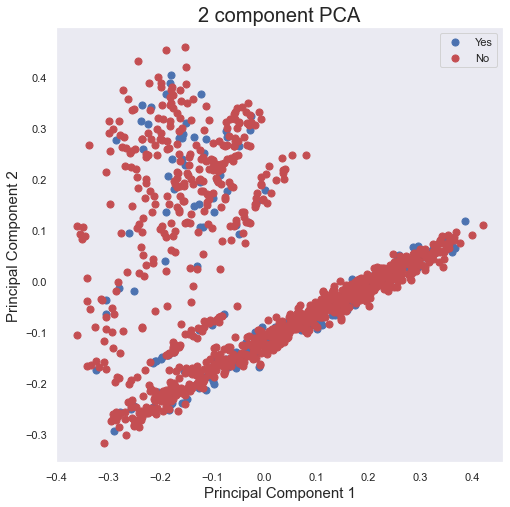

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Yes', 'No']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Attrition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [57]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_kpca, y_train)
y_pred = logistic_classifier.predict(X_test_kpca)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[236   0]
 [ 58   0]]


0.8027210884353742

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294



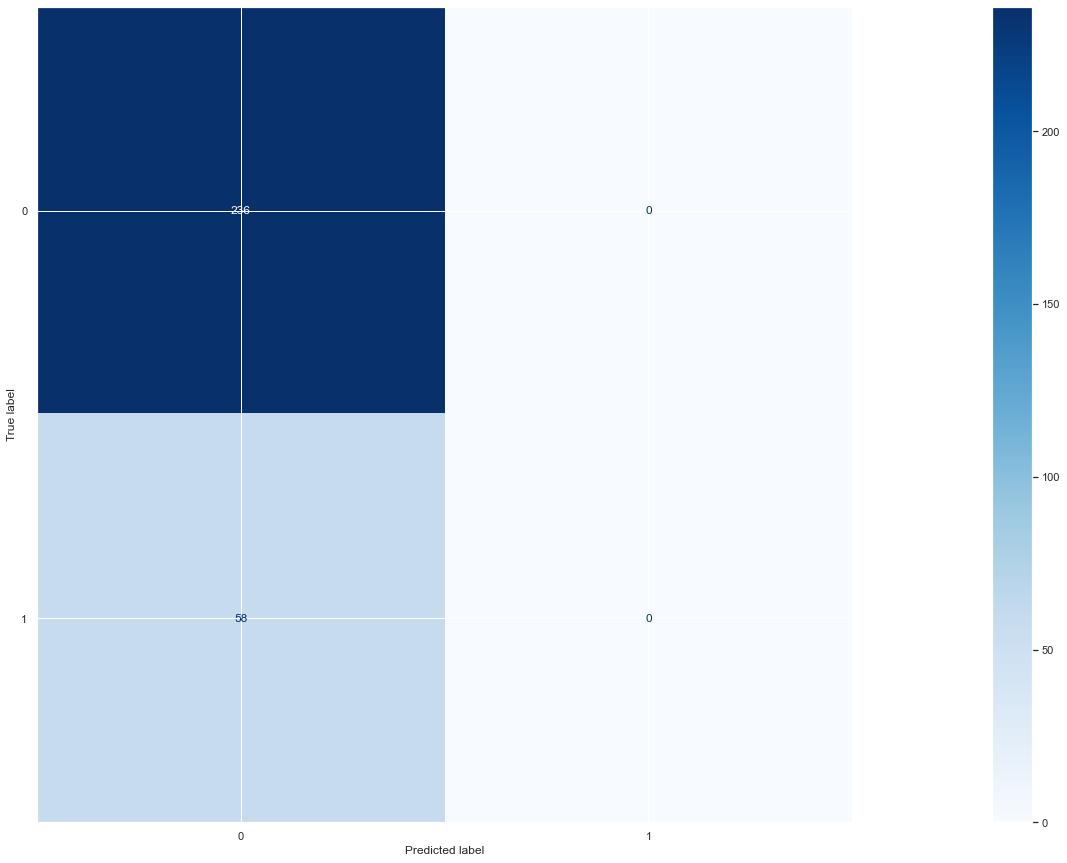

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

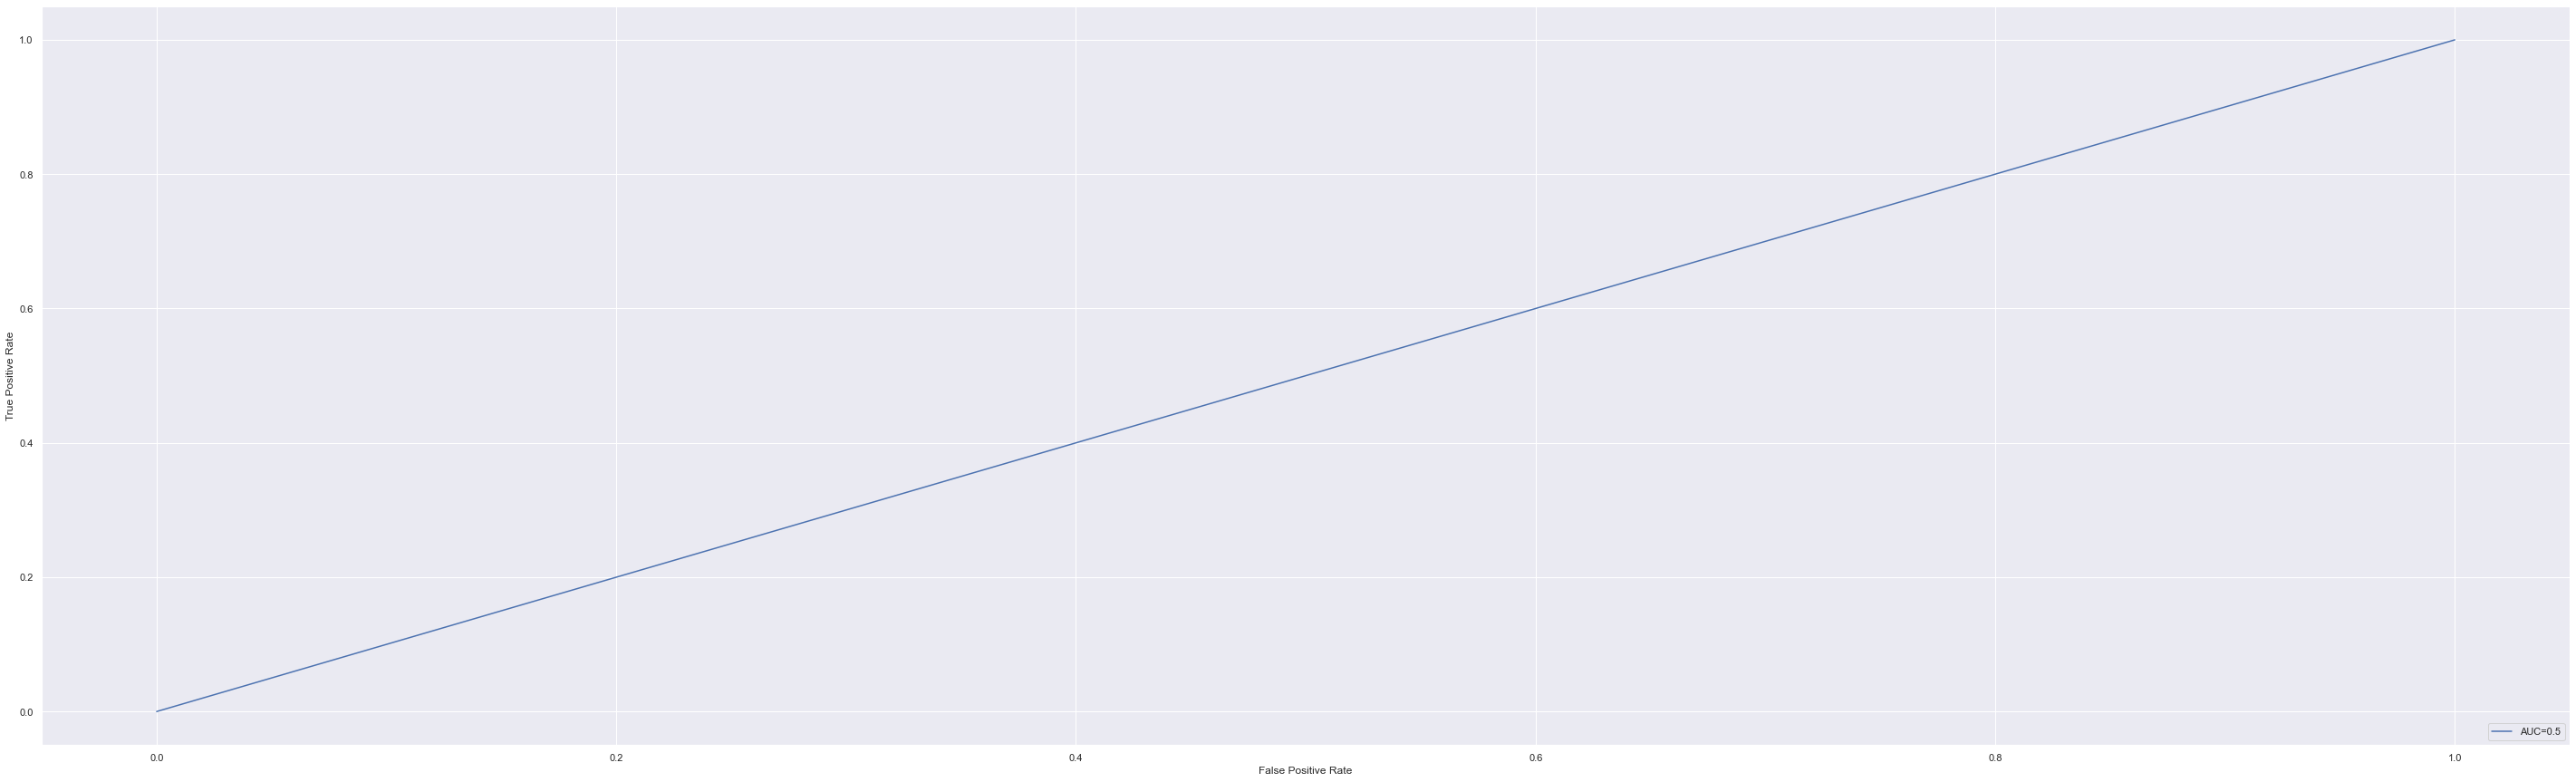

In [60]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [61]:
print(X_train_kpca)

[[-0.03452721 -0.13829567]
 [ 0.14514302 -0.03241171]
 [ 0.1332503  -0.05401392]
 ...
 [-0.22941077 -0.17539798]
 [-0.32584985 -0.09072066]
 [-0.00319676  0.16005378]]


# Classification Models

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)

#print(np.concatenate((y_pred.reshape(len(y_pred), 1)), (y_pred.reshape(len(y_pred), 1)), 1))

In [63]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [64]:
print(y_test)

[1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0]


In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[230   6]
 [ 38  20]]


0.8503401360544217

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       236
           1       0.77      0.34      0.48        58

    accuracy                           0.85       294
   macro avg       0.81      0.66      0.69       294
weighted avg       0.84      0.85      0.83       294



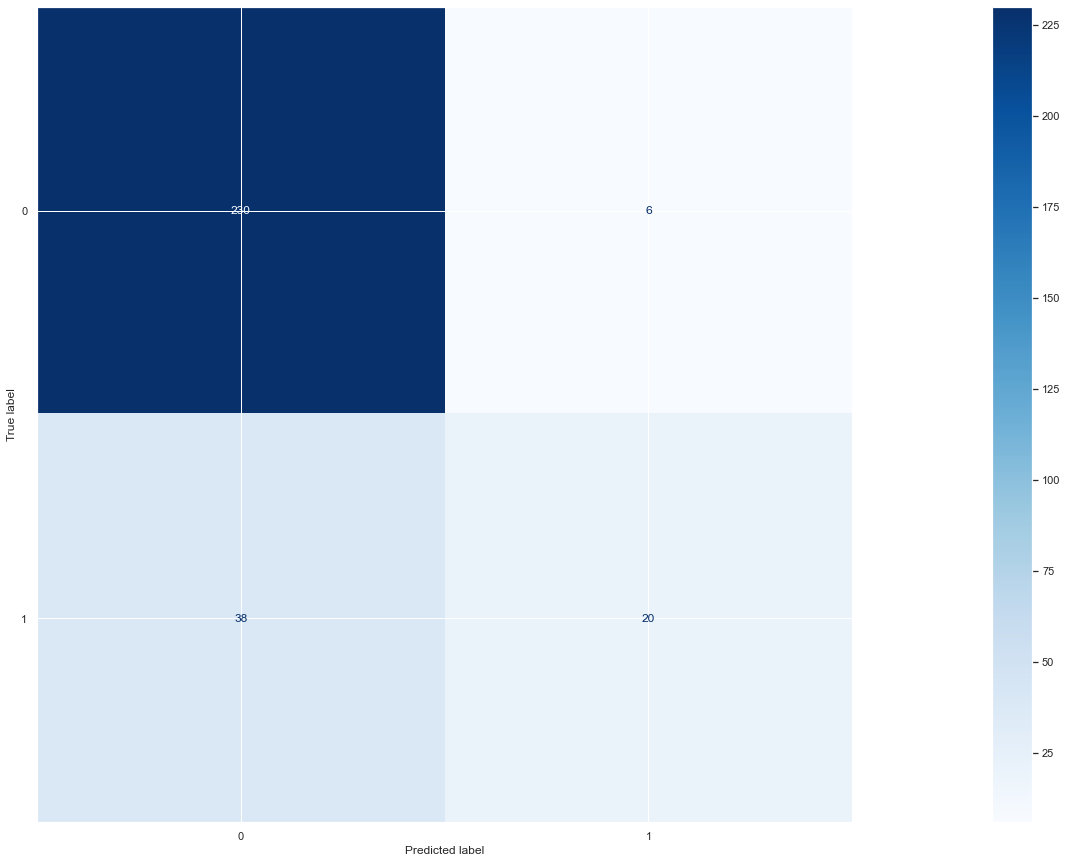

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

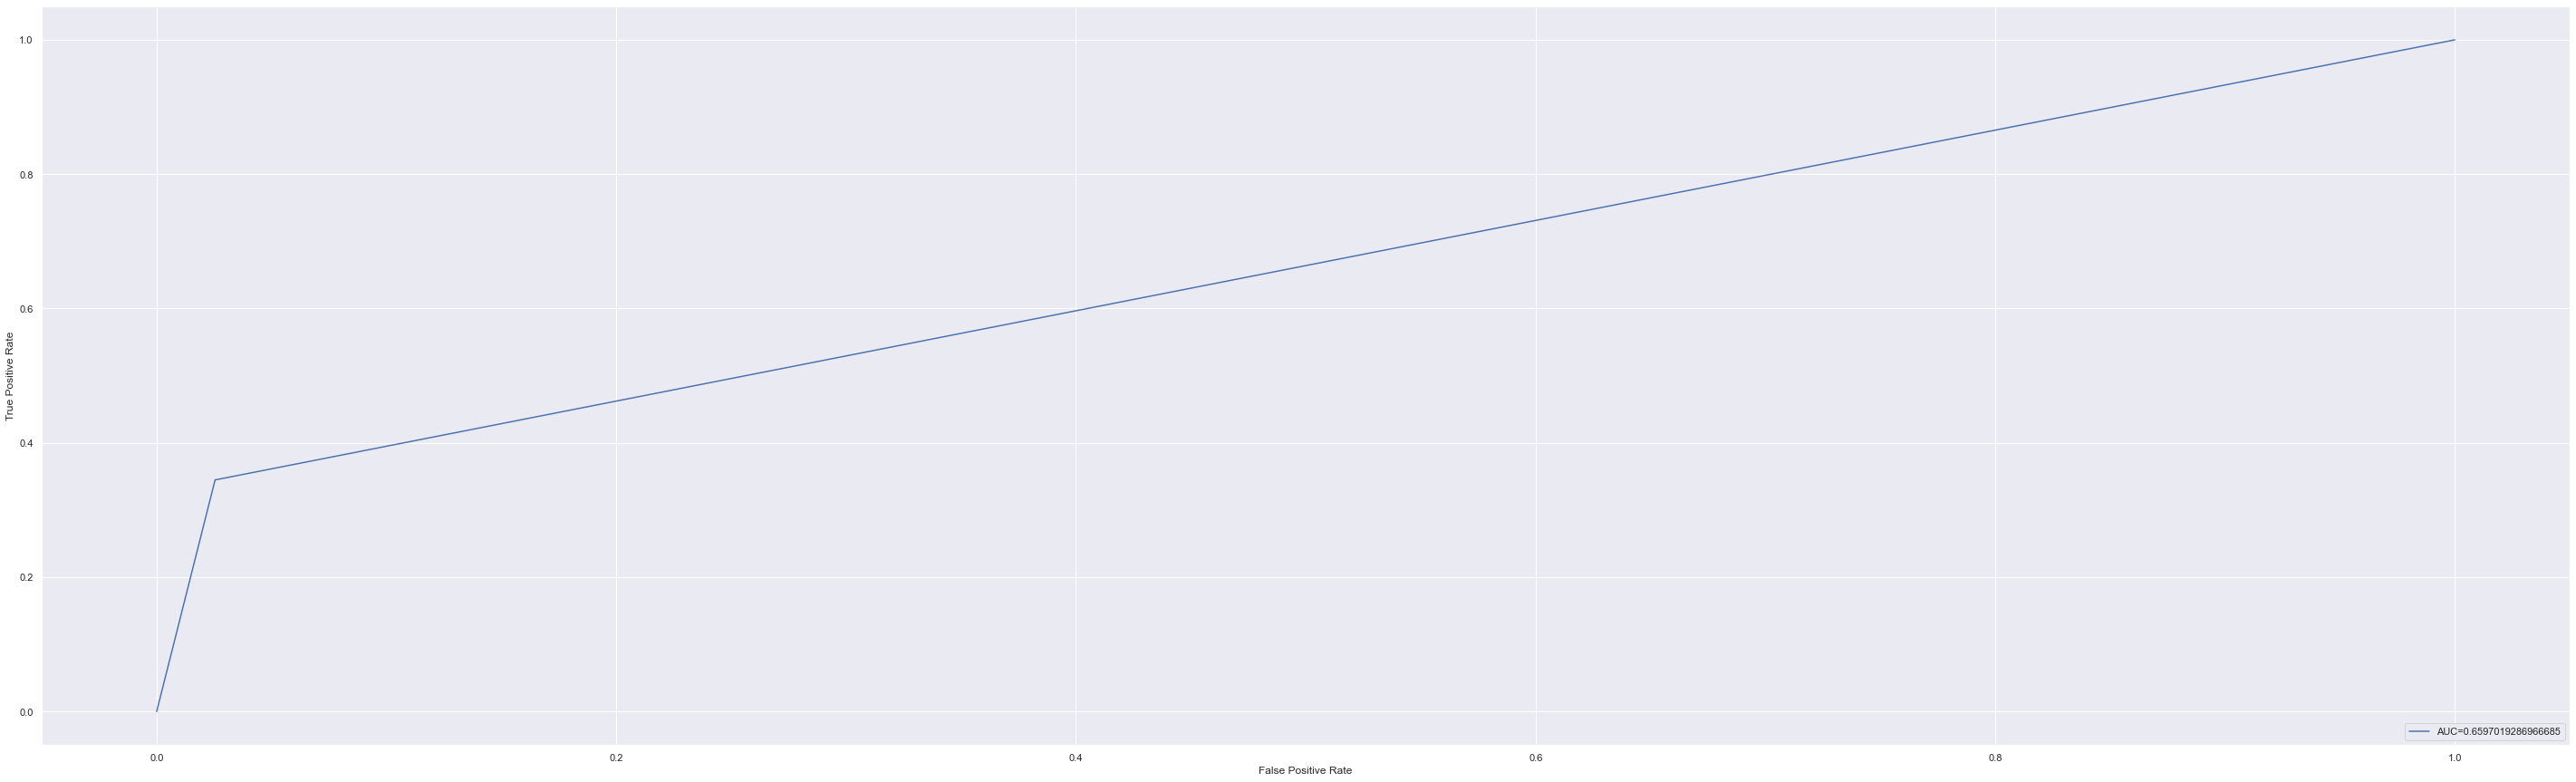

In [67]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [68]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.89830508 0.86440678 0.88983051 0.88135593 0.83050847 0.89830508
 0.90598291 0.90598291 0.88888889 0.87179487]
Accuracy is 88.35361437056352
Standard Deviation is 2.1983415274977895


### K-Nearest Neighbor

In [69]:
'''
Number of neighbors considered is 5
Distance metric used is Euclidean
'''
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [70]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[226  10]
 [ 52   6]]


0.7891156462585034

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       236
           1       0.38      0.10      0.16        58

    accuracy                           0.79       294
   macro avg       0.59      0.53      0.52       294
weighted avg       0.73      0.79      0.74       294



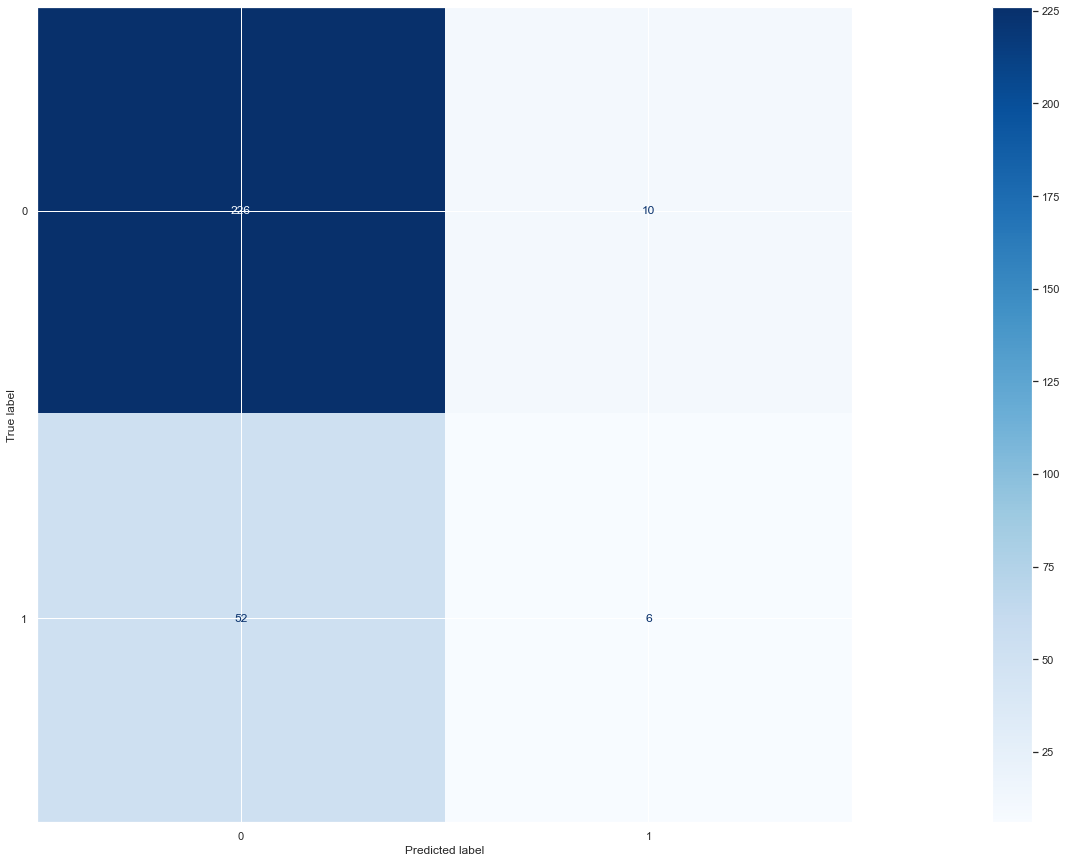

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

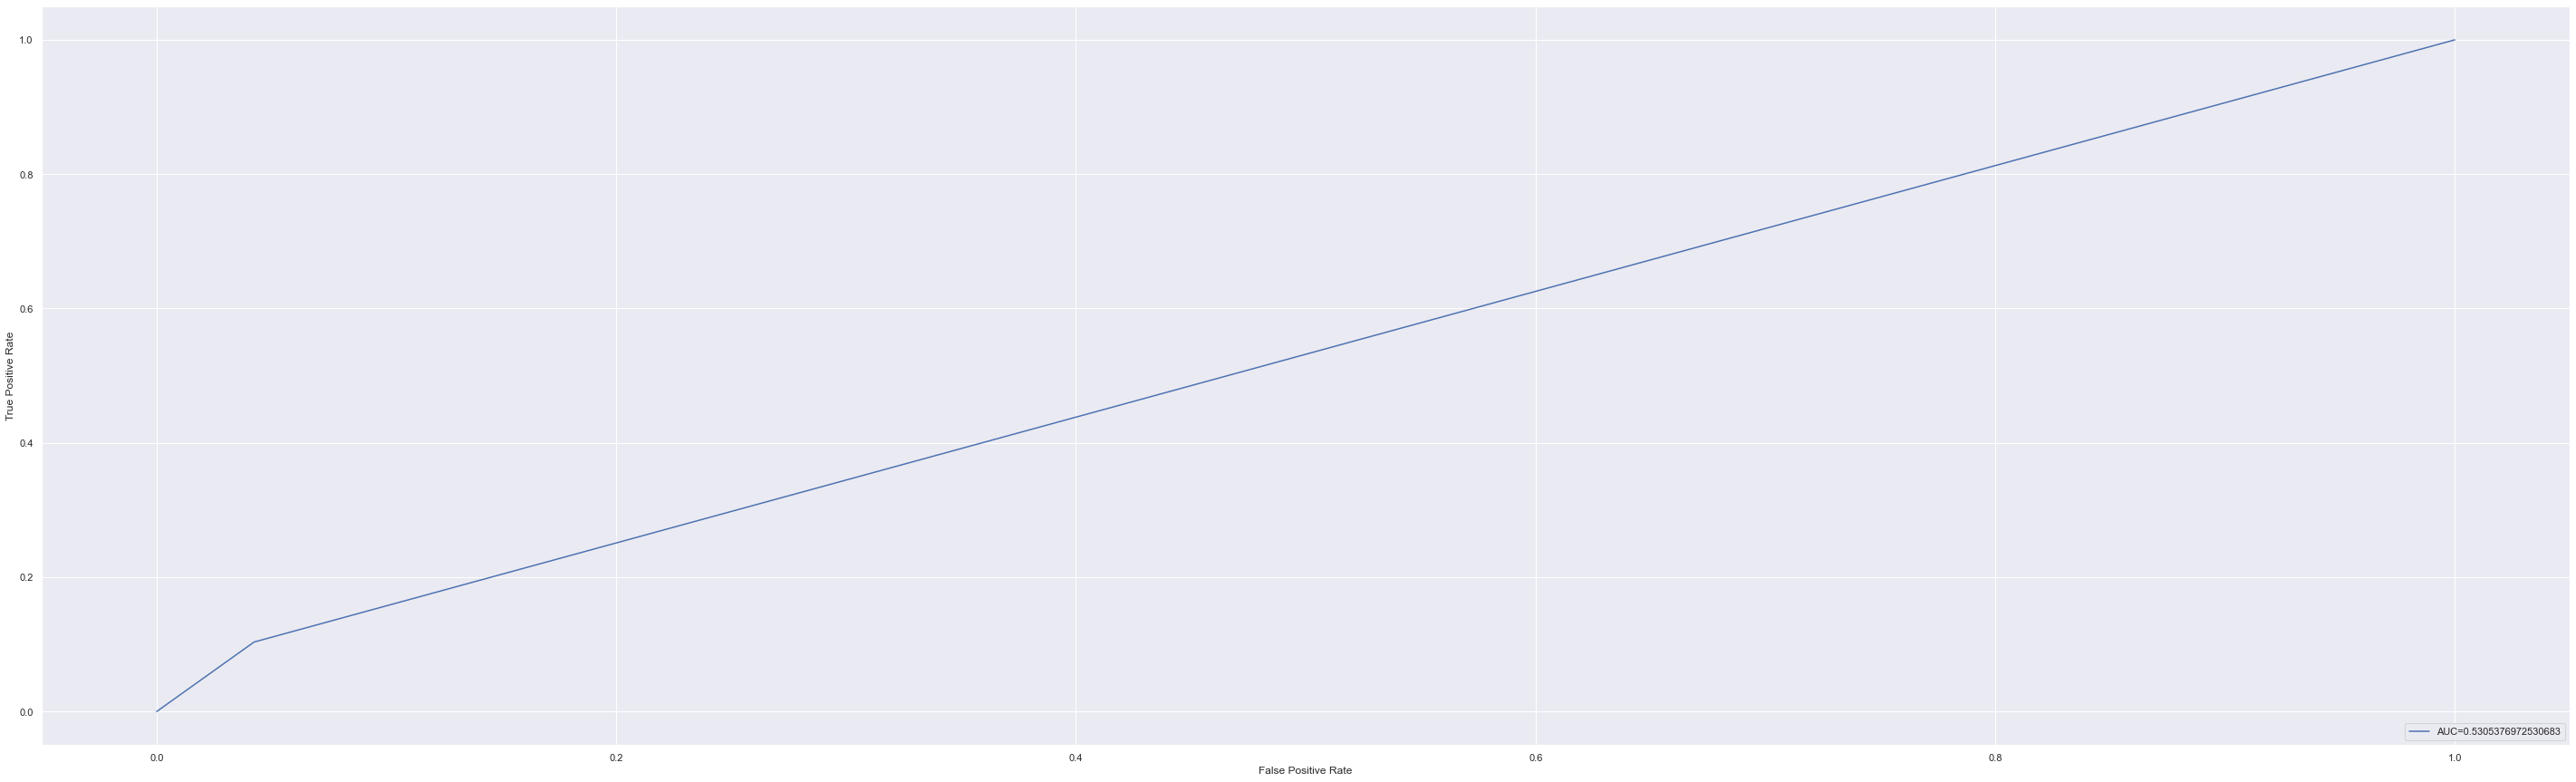

In [73]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [74]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.83050847 0.8559322  0.83898305 0.83050847 0.84745763 0.88983051
 0.88034188 0.87179487 0.86324786 0.84615385]
Accuracy is 85.54758800521513
Standard Deviation is 1.948186000722126


### Support Vector Machine

In [75]:
'''
Using the Linear Kernel for SVM since we figured out from the Grid Search technique that the Linear Kernel 
gives better performance. Grid Search is implemented later in this section.
'''

from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [76]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[230   6]
 [ 38  20]]


0.8503401360544217

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       236
           1       0.77      0.34      0.48        58

    accuracy                           0.85       294
   macro avg       0.81      0.66      0.69       294
weighted avg       0.84      0.85      0.83       294



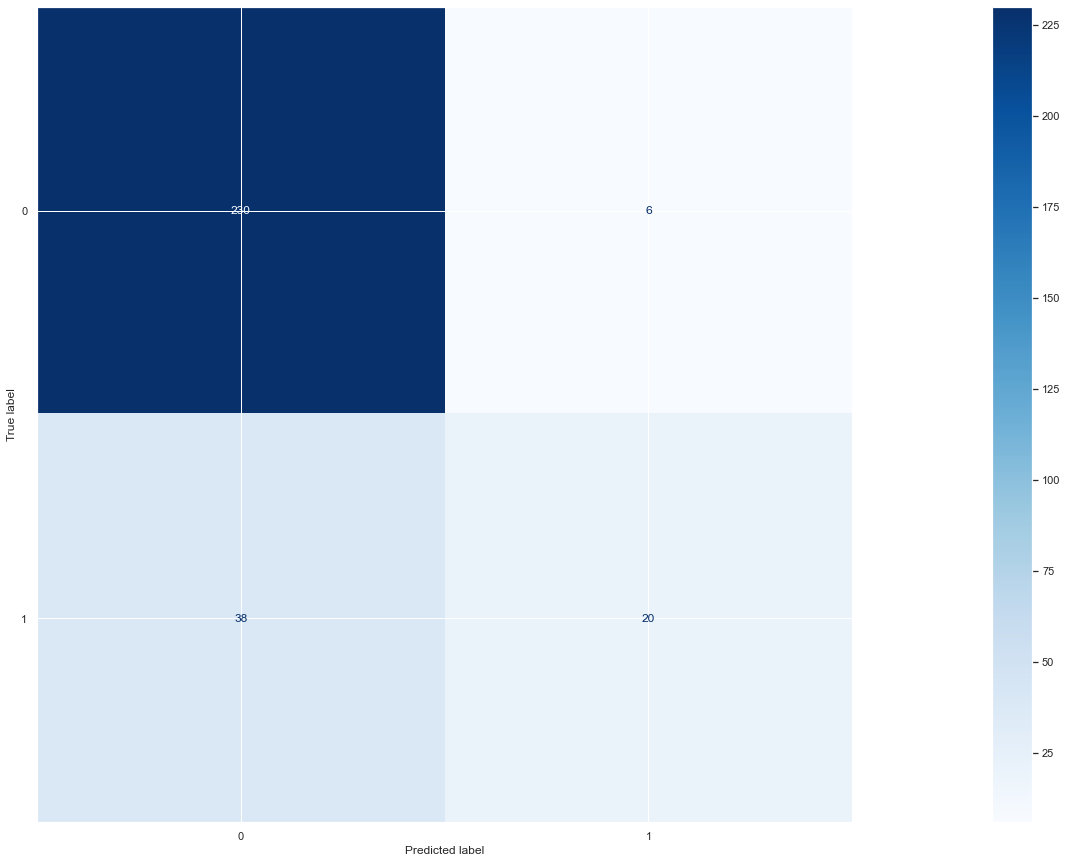

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

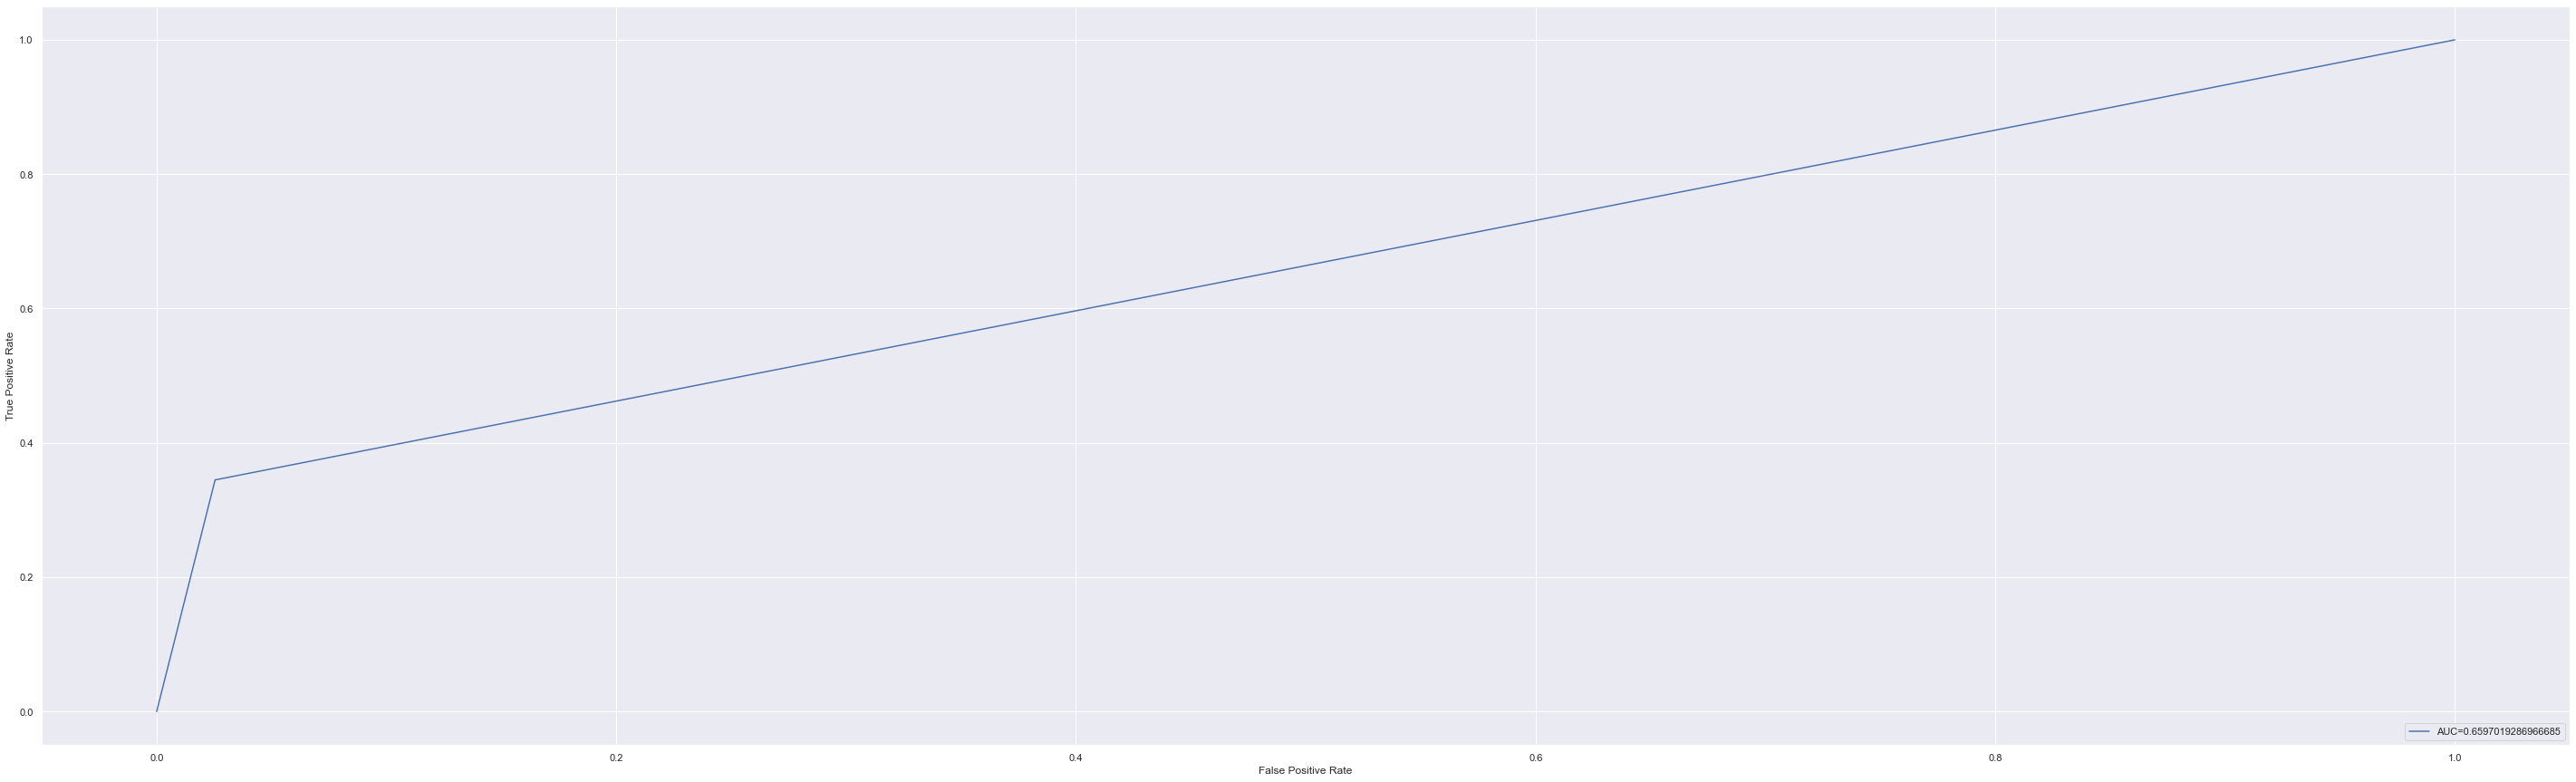

In [79]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [80]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.89830508 0.8559322  0.88983051 0.88983051 0.84745763 0.88135593
 0.90598291 0.8974359  0.8974359  0.88888889]
Accuracy is 88.5245545415037
Standard Deviation is 1.8042850829673611


### Kernel SVM

In [81]:
'''
Implementing the RBF kernel for SVM
'''

from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)
y_pred = kernel_svm_classifier.predict(X_test)

In [82]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[234   2]
 [ 48  10]]


0.8299319727891157

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.83      0.17      0.29        58

    accuracy                           0.83       294
   macro avg       0.83      0.58      0.59       294
weighted avg       0.83      0.83      0.78       294



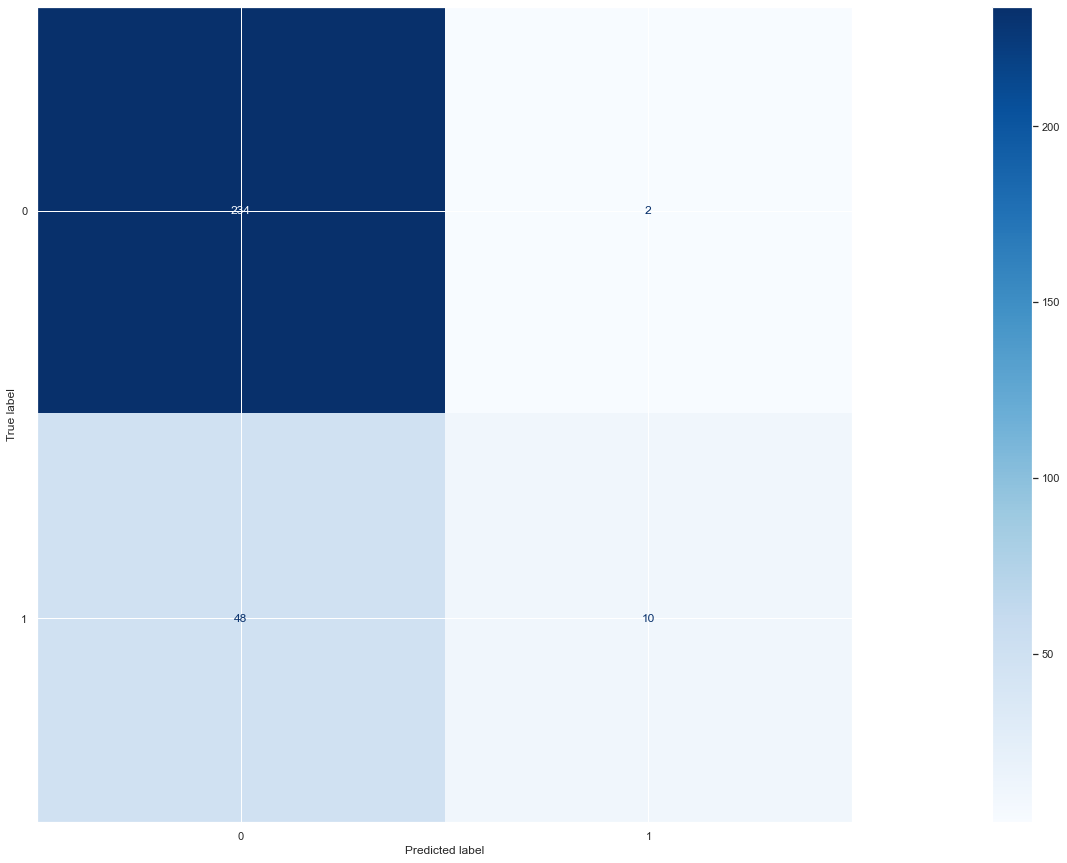

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

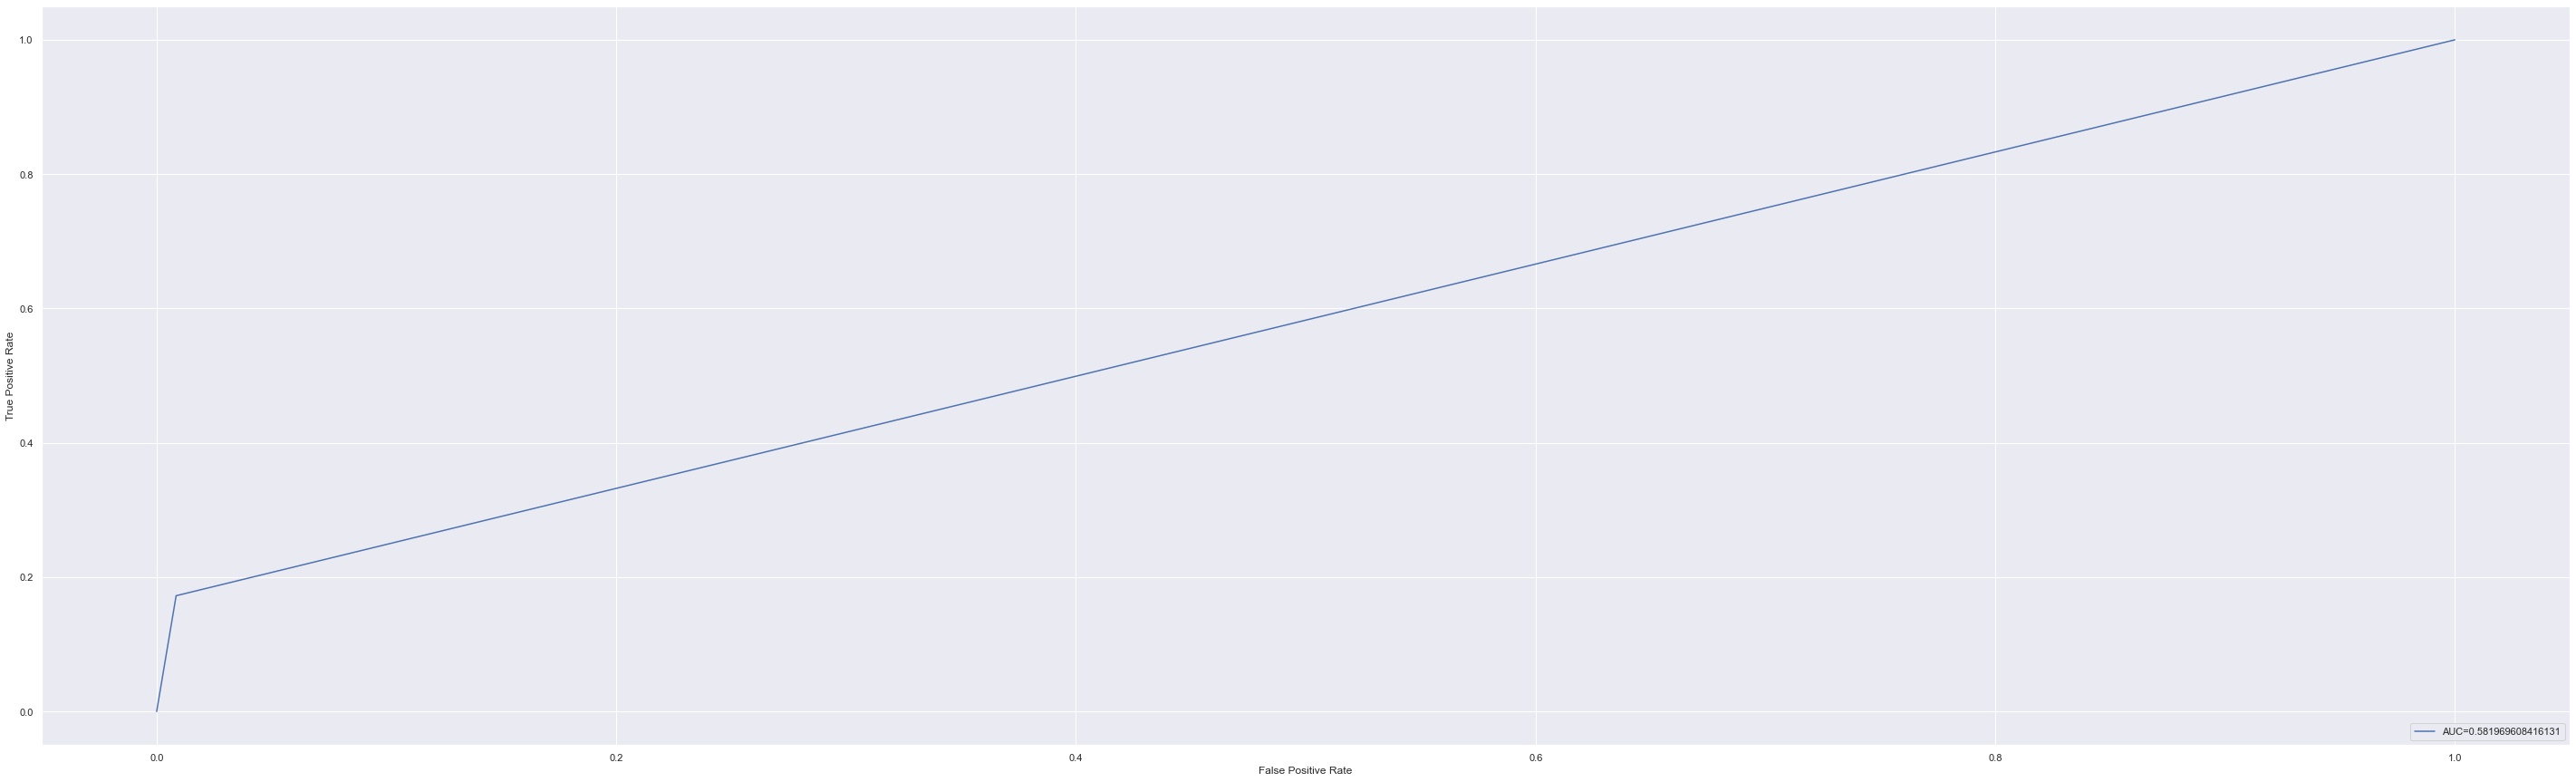

In [85]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [86]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = kernel_svm_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.8559322  0.8559322  0.88135593 0.84745763 0.86440678 0.88983051
 0.88034188 0.87179487 0.87179487 0.86324786]
Accuracy is 86.82094741416776
Standard Deviation is 1.2587231209178158


In [87]:
#Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']}, {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
gridsearch =  GridSearchCV(estimator = svm_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)

gridsearch.fit(X_train, y_train)
best_accuracy = gridsearch.best_score_ 
best_parameters = gridsearch.best_params_

print("Best Accuracy is {}".format(best_accuracy*100))
print("Best parameters are ", best_parameters)                                                               

Best Accuracy is 88.86426191510937
Best parameters are  {'C': 0.25, 'kernel': 'linear'}


### Naive Bayes 

In [88]:
'''
Probabilistic model for classification.
'''

from sklearn.naive_bayes import GaussianNB
naivebayes_classifier = GaussianNB()
naivebayes_classifier.fit(X_train, y_train)
y_pred = naivebayes_classifier.predict(X_test)

In [89]:
print(y_pred)

[0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1
 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1]


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[160  76]
 [ 21  37]]


0.6700680272108843

              precision    recall  f1-score   support

           0       0.88      0.68      0.77       236
           1       0.33      0.64      0.43        58

    accuracy                           0.67       294
   macro avg       0.61      0.66      0.60       294
weighted avg       0.77      0.67      0.70       294



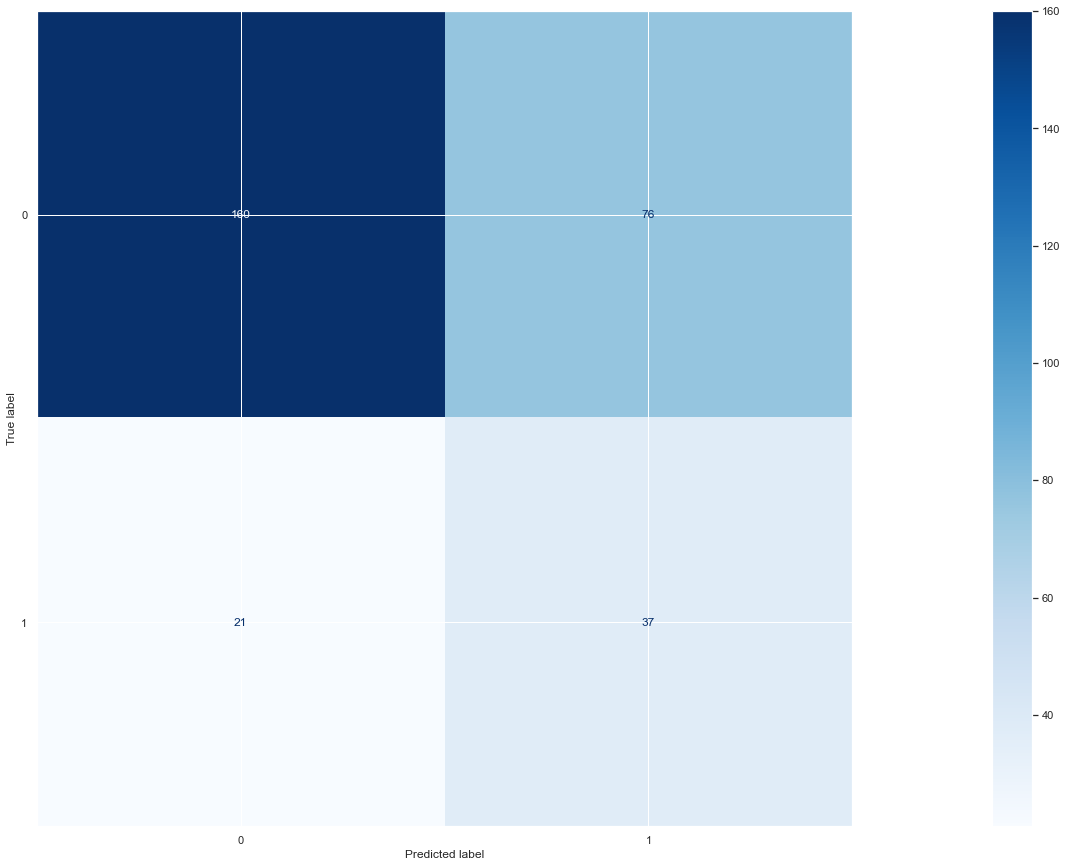

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

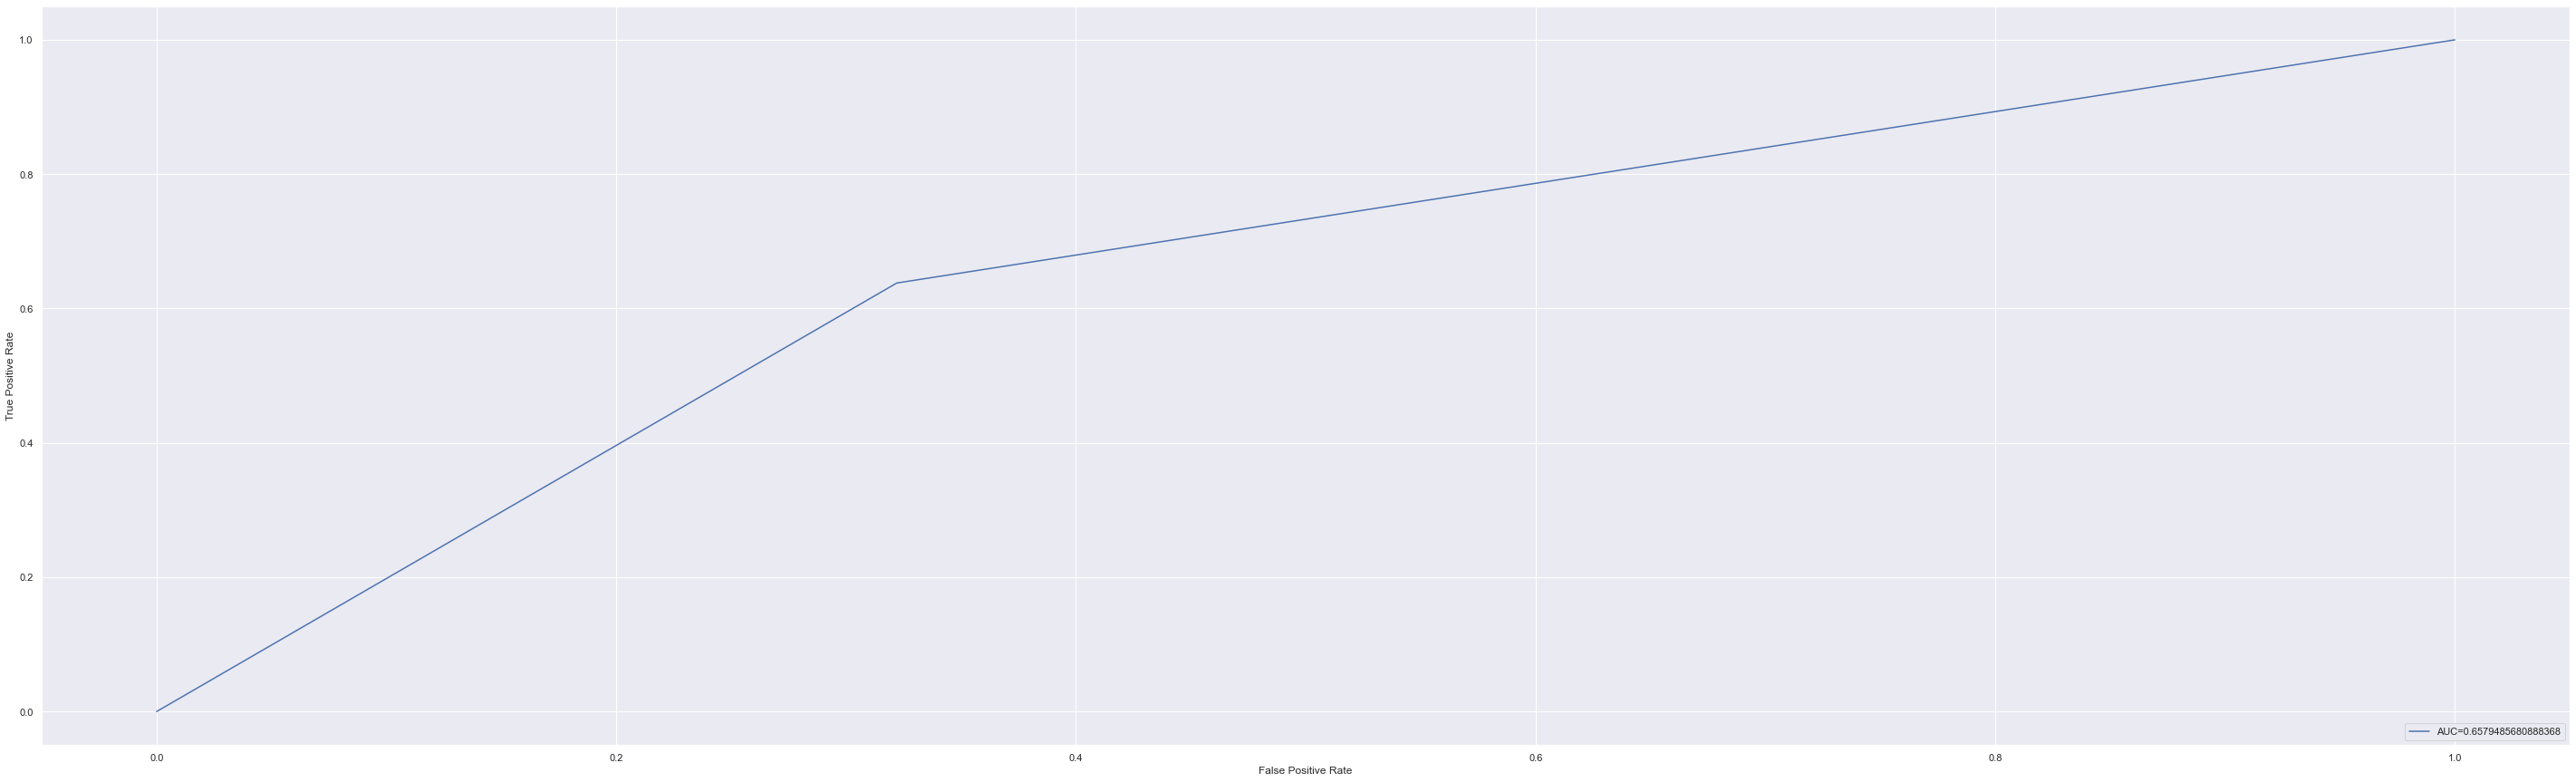

In [92]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [93]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = naivebayes_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.66101695 0.70338983 0.79661017 0.66949153 0.66949153 0.76271186
 0.73504274 0.64102564 0.70940171 0.62393162]
Accuracy is 69.7211357380849
Standard Deviation is 5.211717474042669


### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
decisiontree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decisiontree_classifier.fit(X_train, y_train)
y_pred = decisiontree_classifier.predict(X_test)

In [95]:
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[214  22]
 [ 42  16]]


0.782312925170068

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       236
           1       0.42      0.28      0.33        58

    accuracy                           0.78       294
   macro avg       0.63      0.59      0.60       294
weighted avg       0.75      0.78      0.76       294



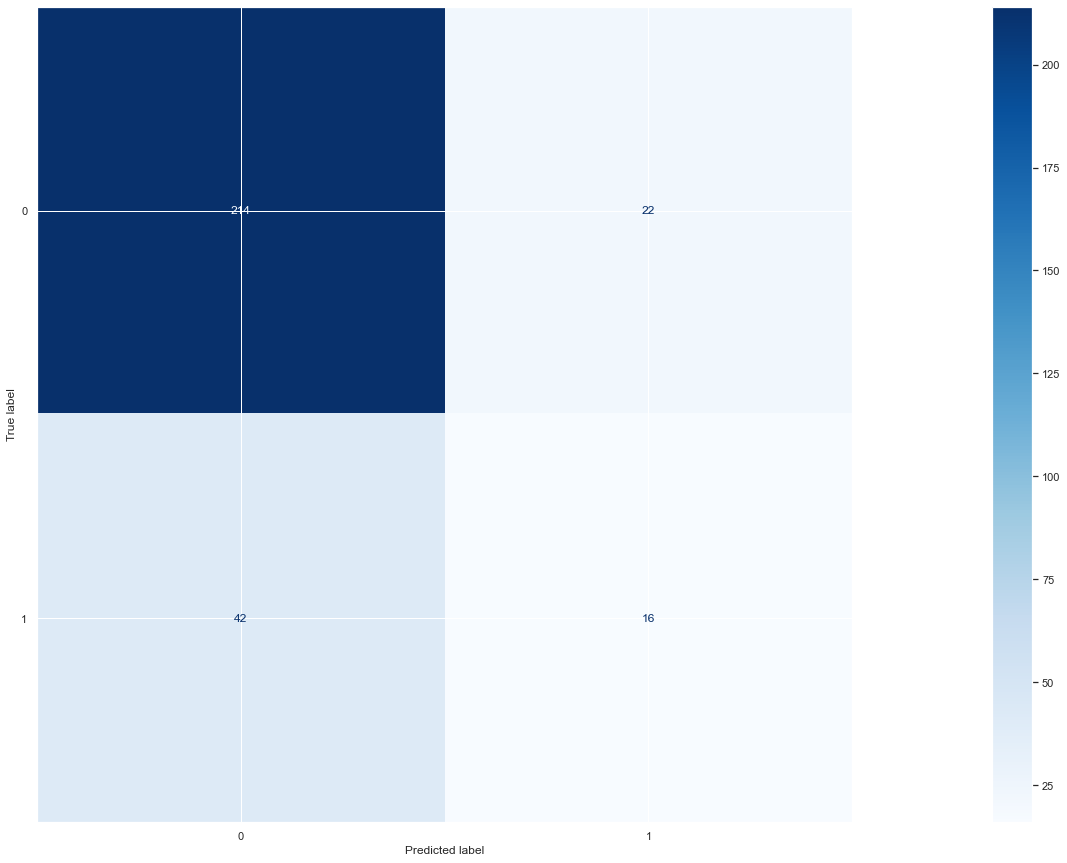

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

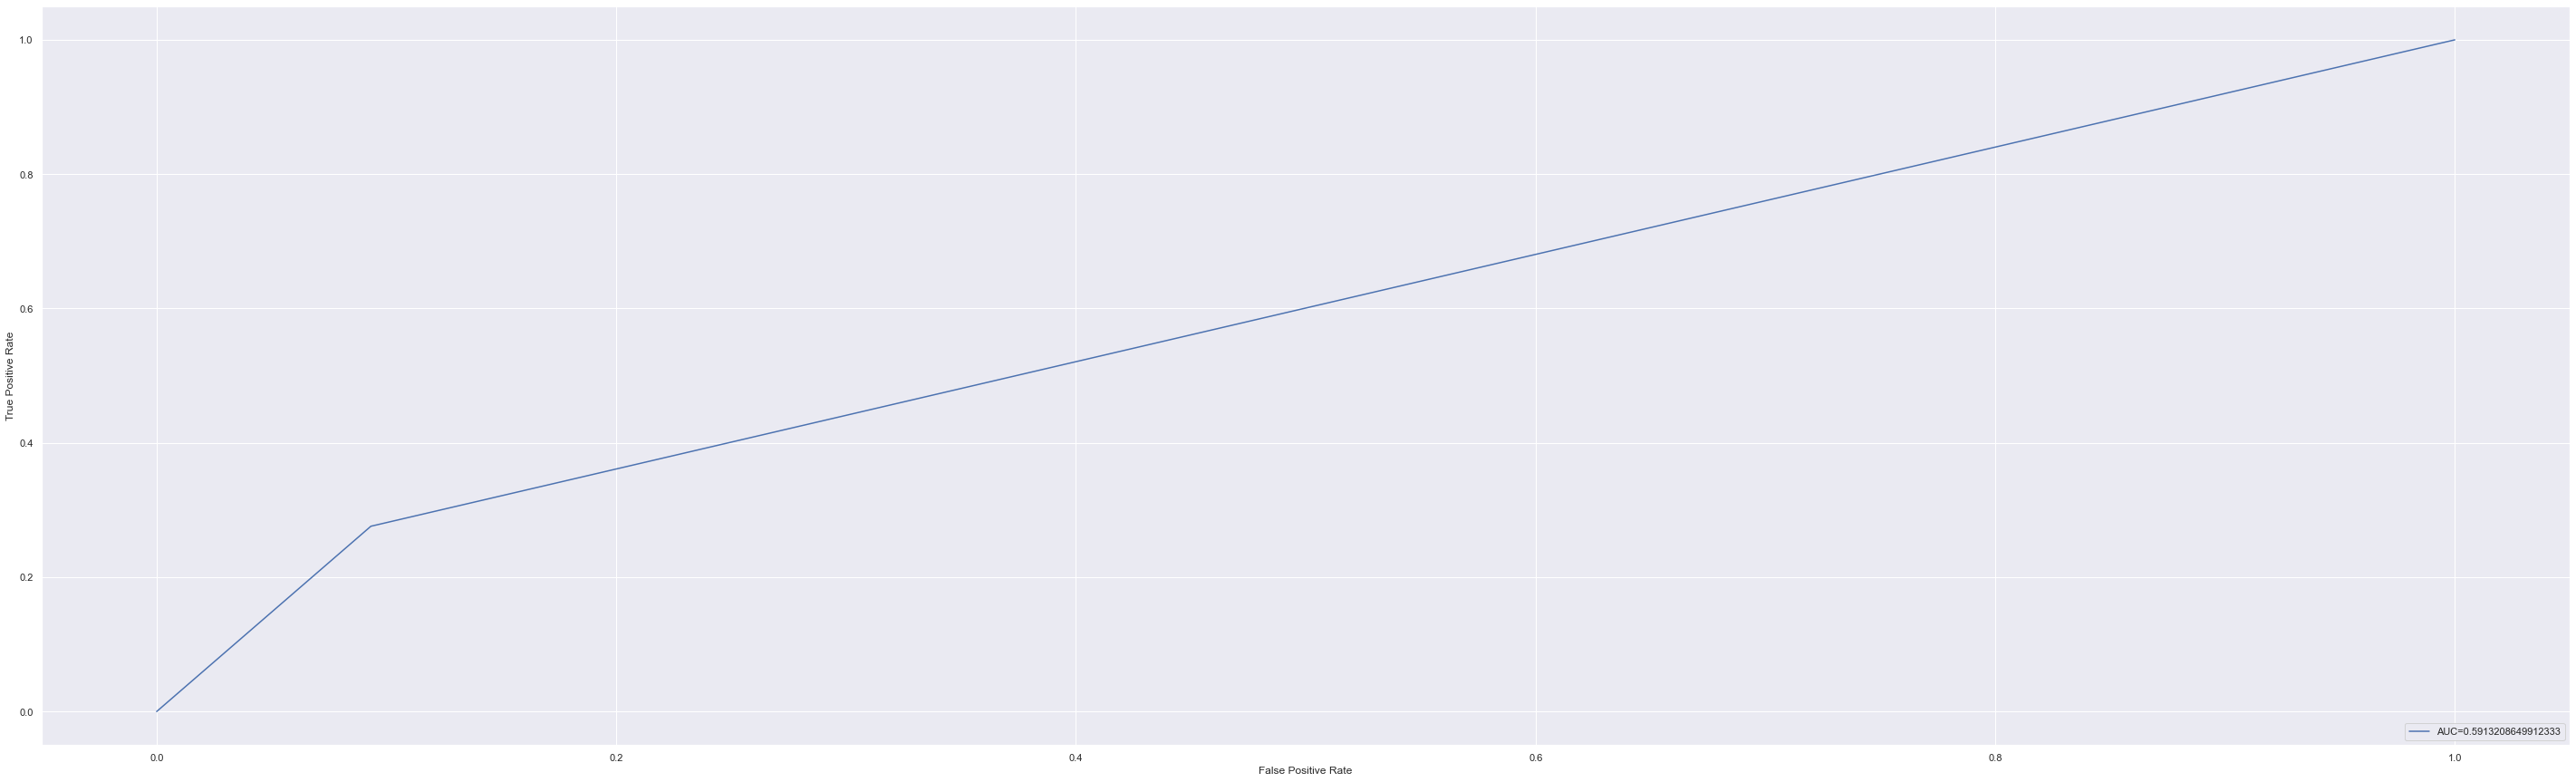

In [98]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [99]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decisiontree_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.80508475 0.72881356 0.75423729 0.76271186 0.81355932 0.8559322
 0.85470085 0.82905983 0.74358974 0.76923077]
Accuracy is 79.16920179632044
Standard Deviation is 4.377848275612897


### Random Forest

In [100]:
#The maximum height upto which the trees can grow is 100. The criterion chosen is Entropy.
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
randomforest_classifier.fit(X_train, y_train)
y_pred = randomforest_classifier.predict(X_test)

In [101]:
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[232   4]
 [ 48  10]]


0.8231292517006803

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       236
           1       0.71      0.17      0.28        58

    accuracy                           0.82       294
   macro avg       0.77      0.58      0.59       294
weighted avg       0.81      0.82      0.78       294



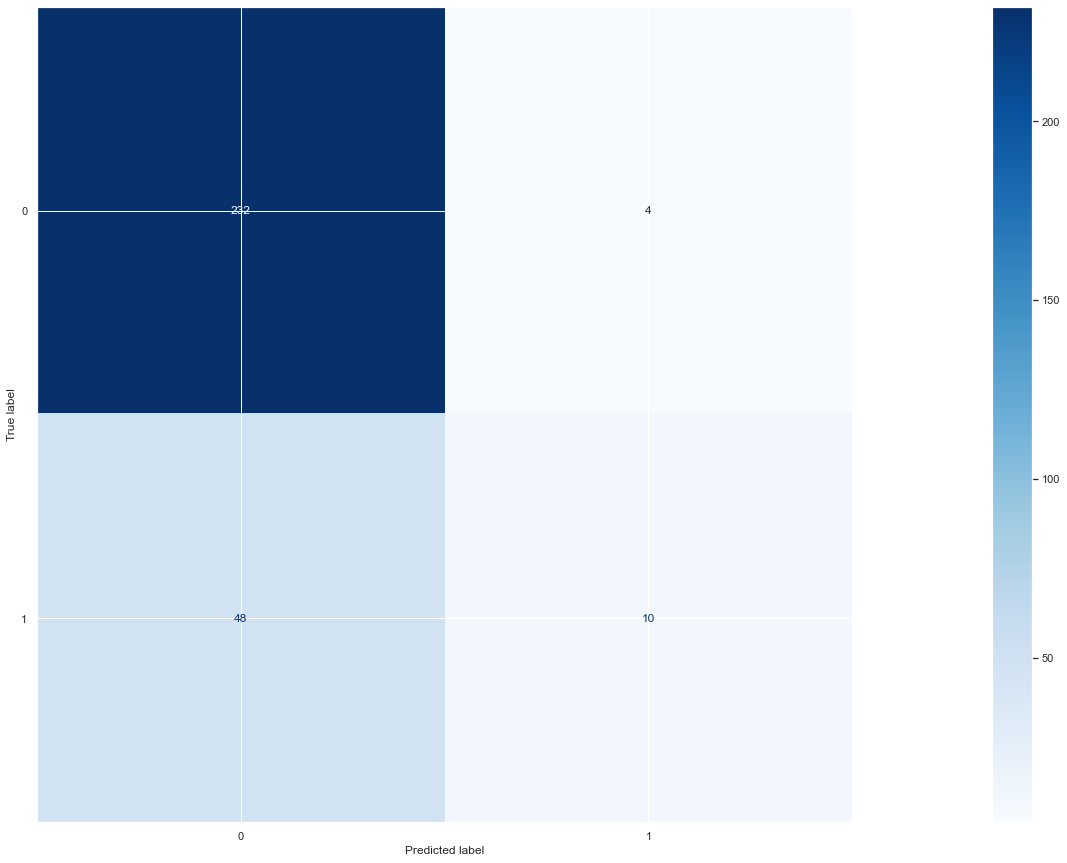

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

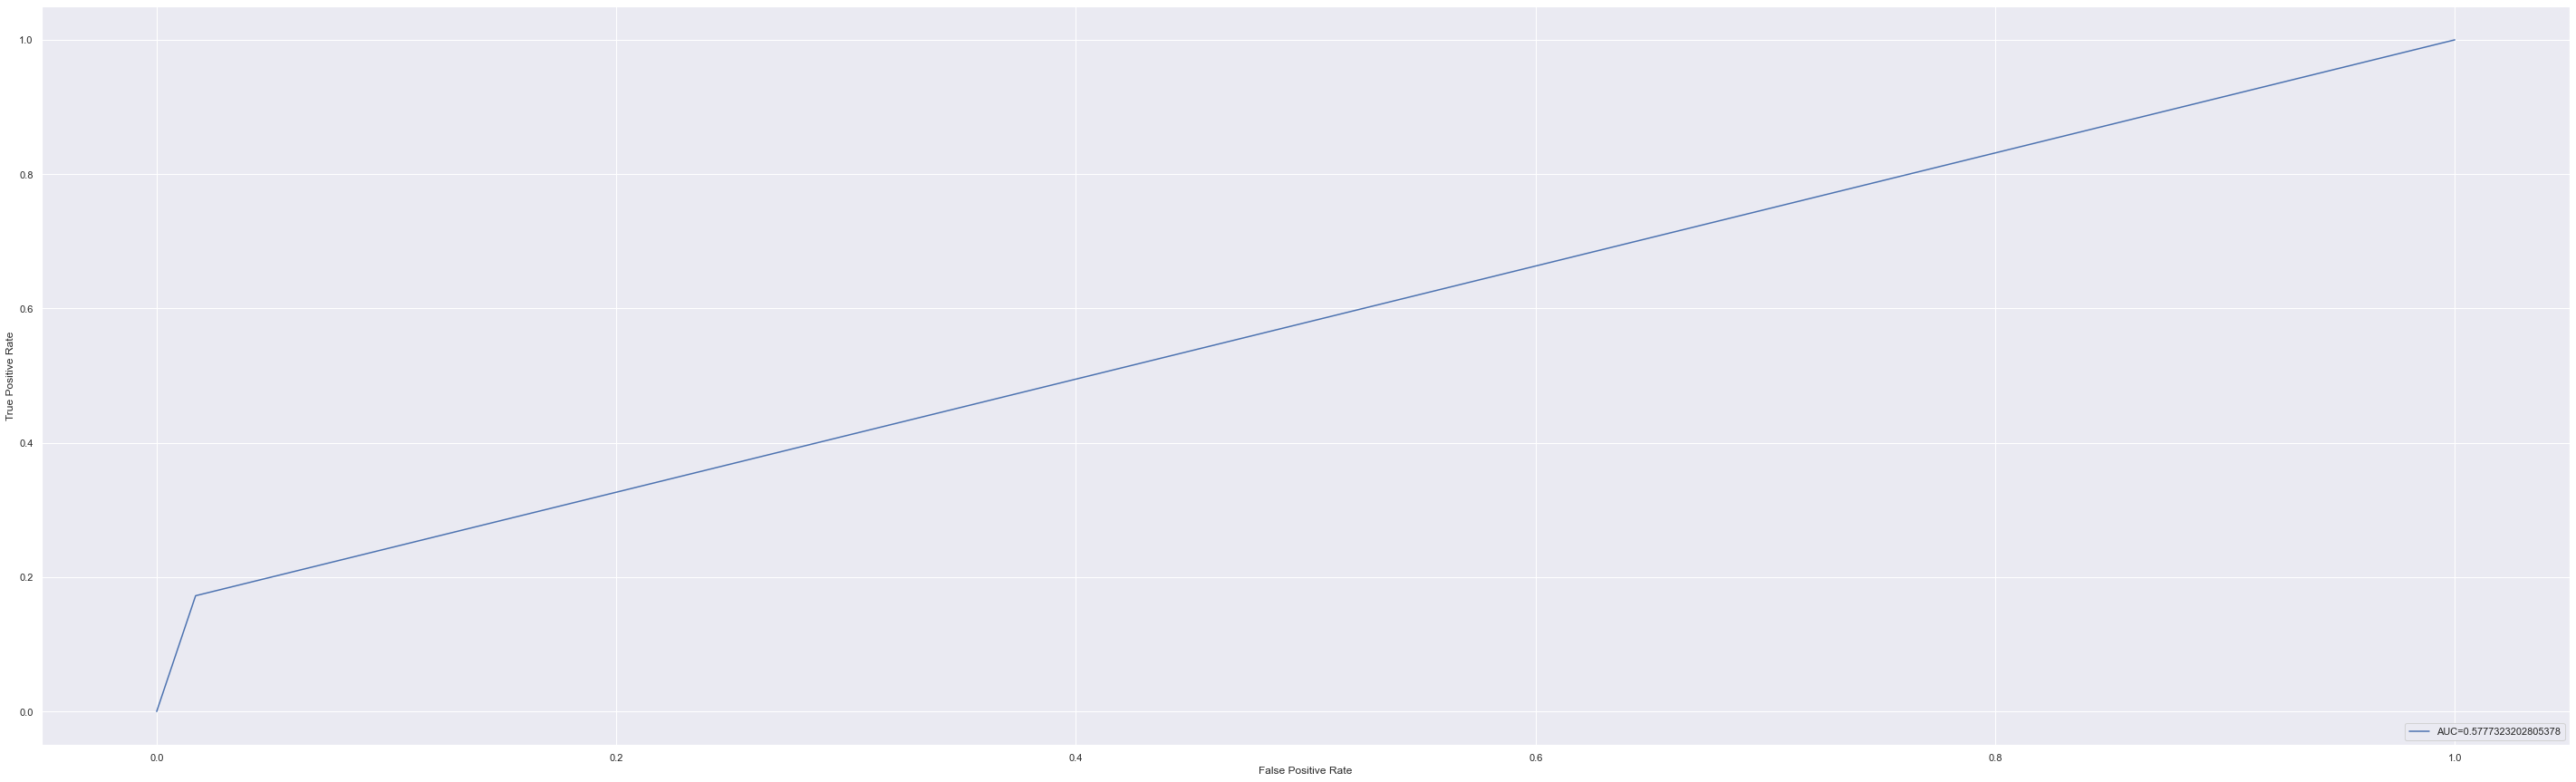

In [104]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [105]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = randomforest_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.86440678 0.8559322  0.88135593 0.86440678 0.86440678 0.87288136
 0.86324786 0.88034188 0.86324786 0.84615385]
Accuracy is 86.56381283499928
Standard Deviation is 1.0027620115213363


### Bagging Classifier

In [106]:
'''
The base estimator chosen is DecisionTreeClassifier and the number of estimators chosen is 250.
'''
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

kfold_cv = model_selection.KFold(n_splits = 5, shuffle = True)
bagging_classifier = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 250, max_samples = 16)
result = model_selection.cross_val_score(bagging_classifier, X_train, y_train, cv = kfold_cv)
print(result.mean())

0.8477785791561485


In [107]:
bagging_classifier.fit(X_train,y_train)
y_pred = bagging_classifier.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[236   0]
 [ 58   0]]


0.8027210884353742

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294



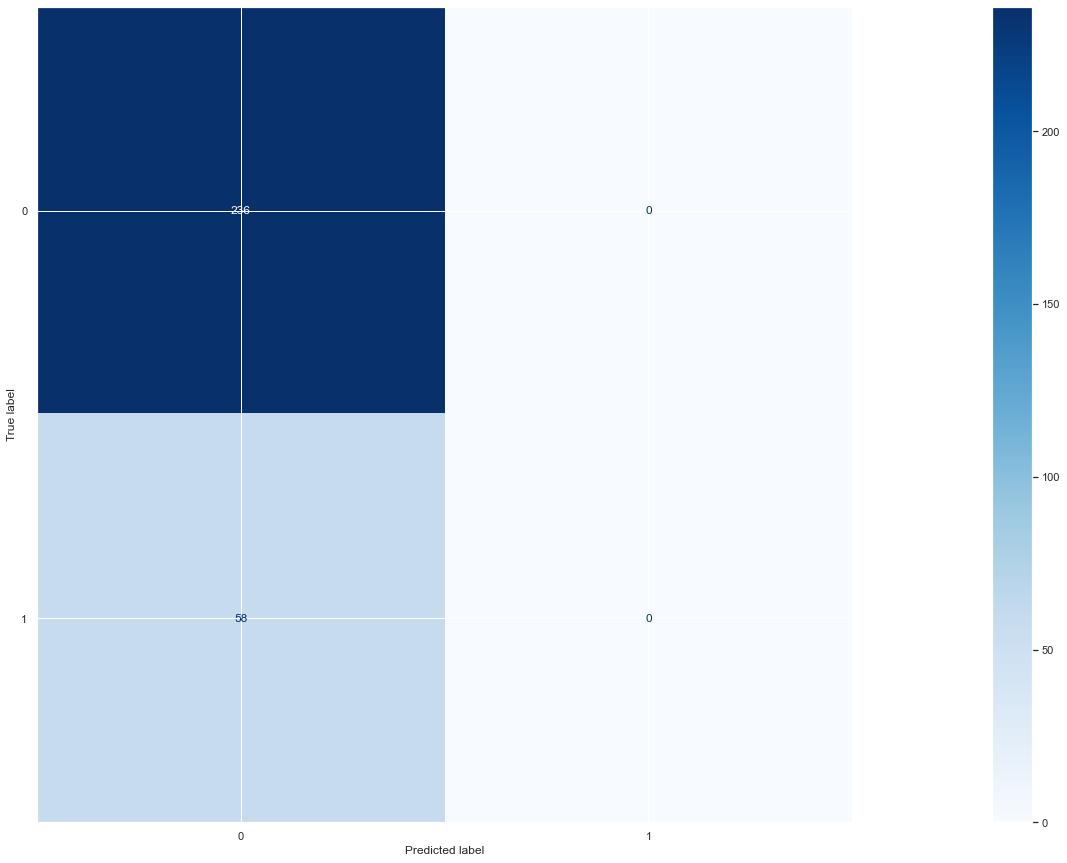

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

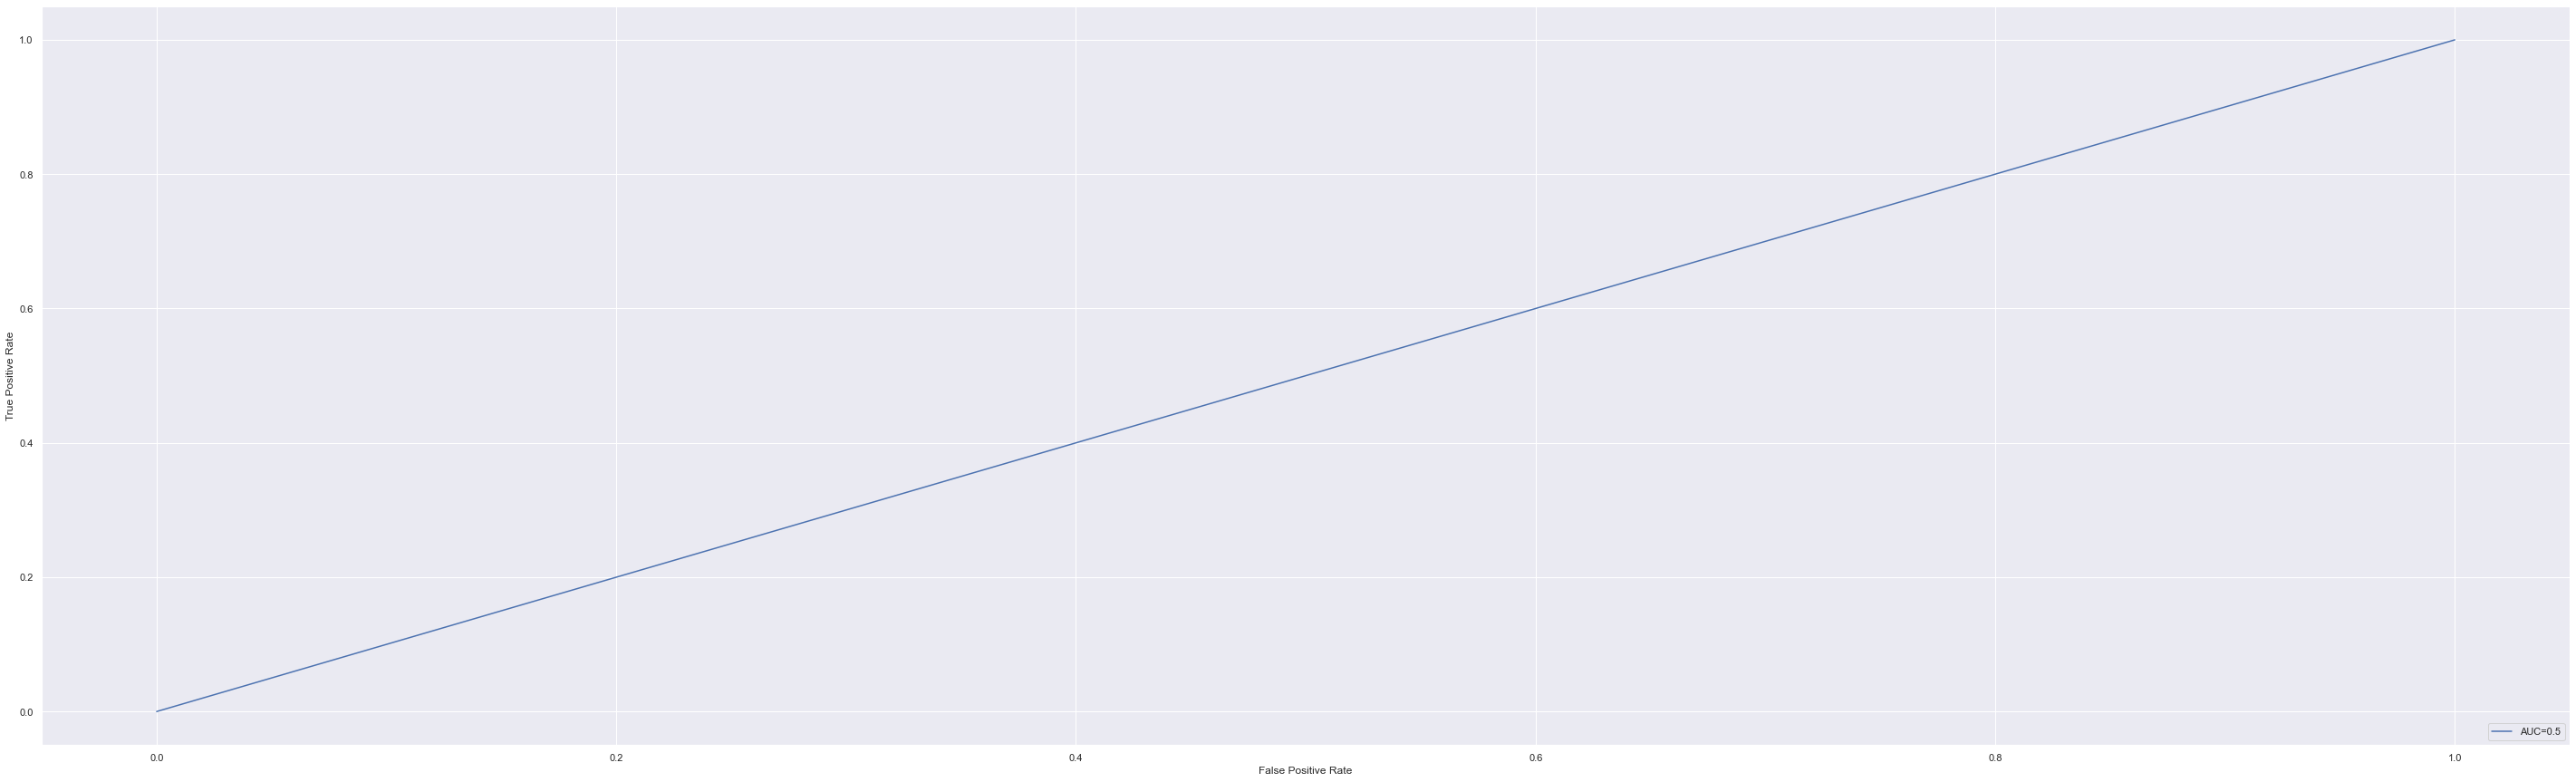

In [110]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [111]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = bagging_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.84745763 0.84745763 0.84745763 0.84745763 0.84745763 0.84745763
 0.85470085 0.84615385 0.84615385 0.84615385]
Accuracy is 84.77908155874256
Standard Deviation is 0.2375999466812101


### Adaboost Classifier

In [112]:
'''
The base estimator chosen is DecisionTreeClassifier and the number of estimators are 70.
The learning rate chosen is 2 in this case.
'''
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier =  AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 70, learning_rate = 2)
adaboost_classifier.fit(X_train, y_train)

result = model_selection.cross_val_score(adaboost_classifier, X_train, y_train, cv = kfold_cv)
print(result.mean())

0.7993112152902994


In [113]:
y_pred = adaboost_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

0.7959183673469388
[[209  27]
 [ 33  25]]


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       236
           1       0.48      0.43      0.45        58

    accuracy                           0.80       294
   macro avg       0.67      0.66      0.66       294
weighted avg       0.79      0.80      0.79       294



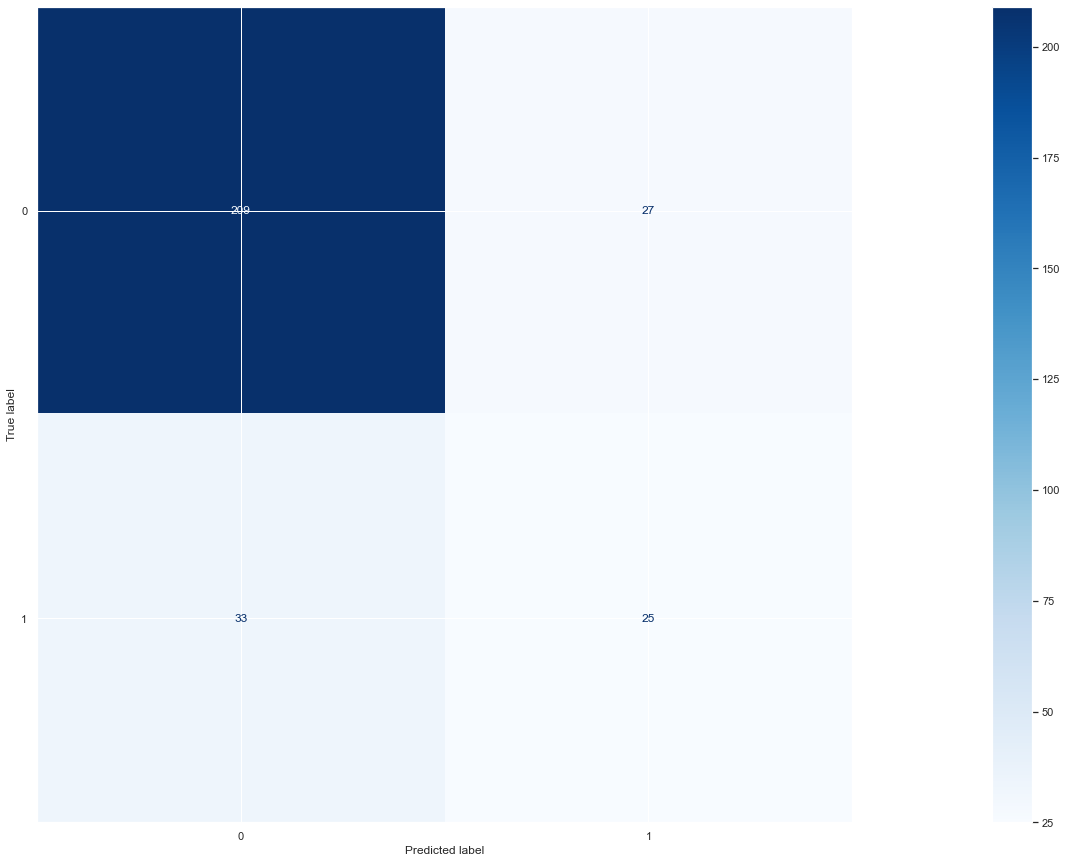

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

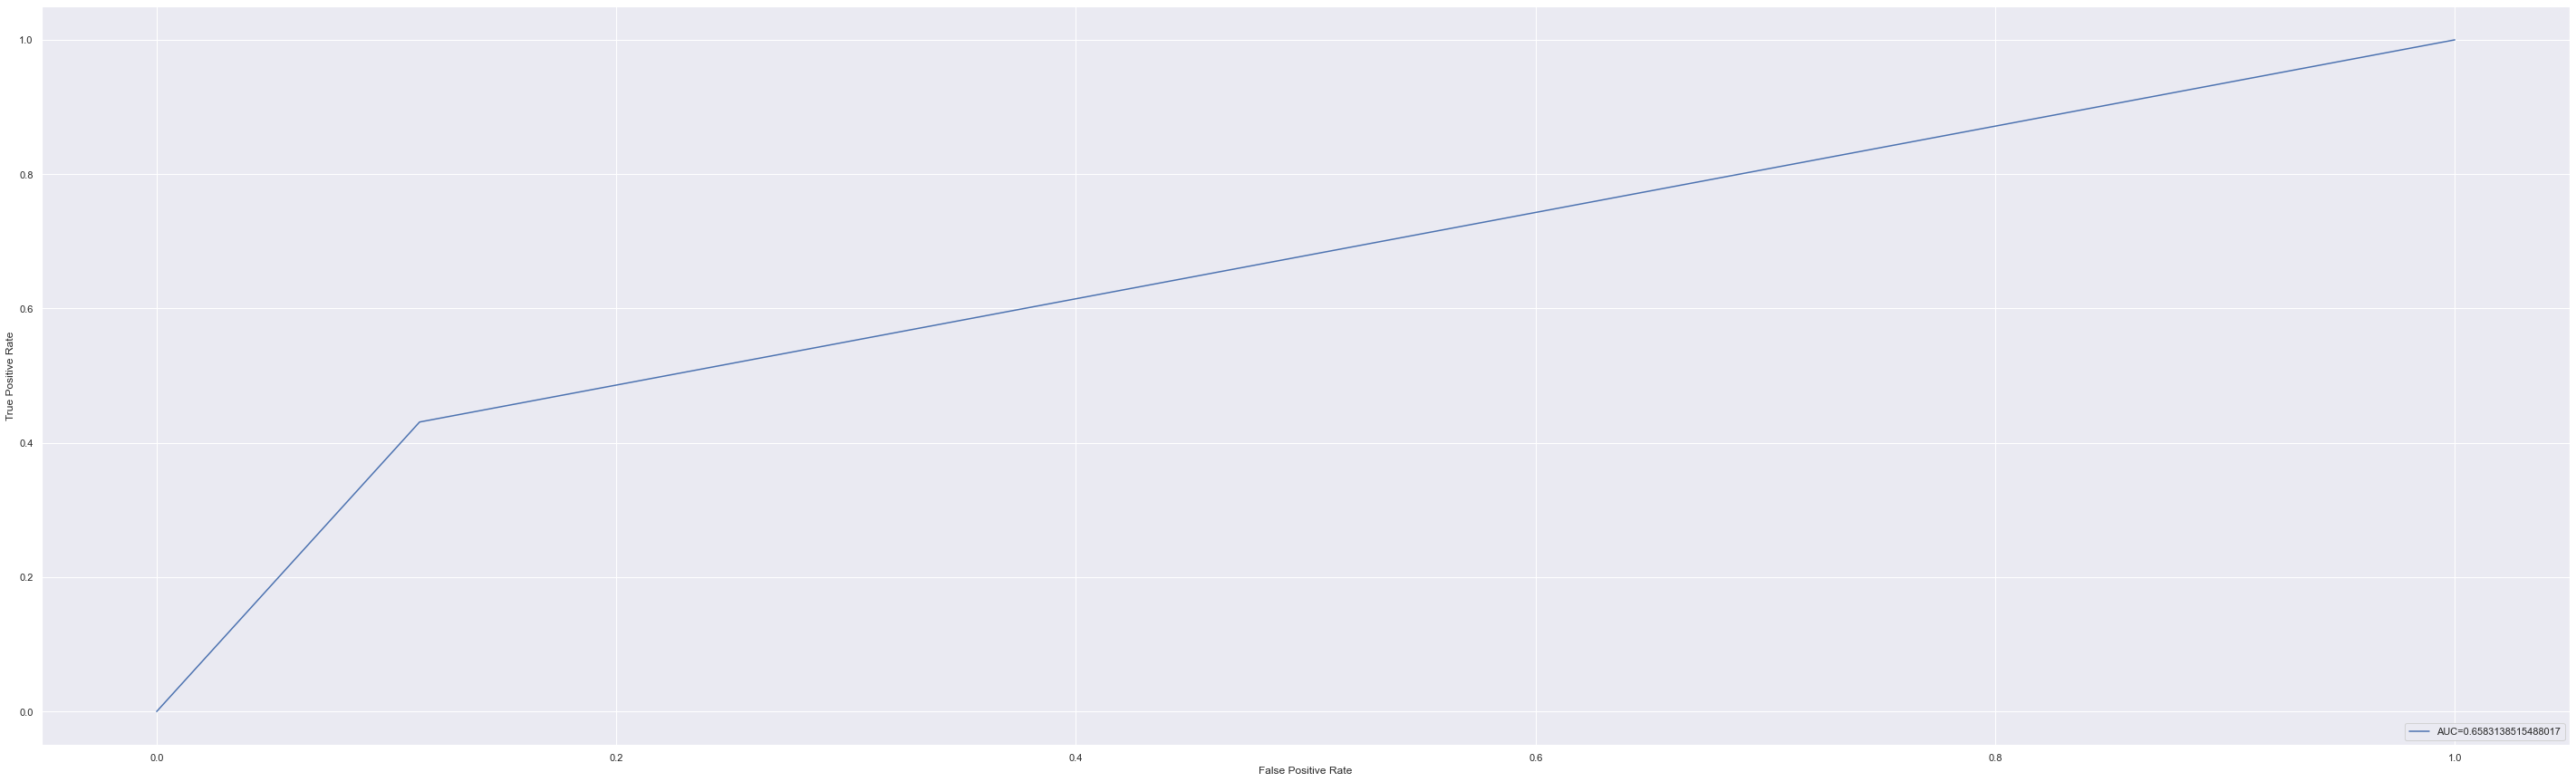

In [116]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [117]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = adaboost_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.75423729 0.73728814 0.78813559 0.76271186 0.77966102 0.80508475
 0.81196581 0.76923077 0.76068376 0.75213675]
Accuracy is 77.21135738084891
Standard Deviation is 2.268867016949371


### XGBoost Classifier

In [118]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

In [119]:
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[226  10]
 [ 39  19]]


0.8333333333333334

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       236
           1       0.66      0.33      0.44        58

    accuracy                           0.83       294
   macro avg       0.75      0.64      0.67       294
weighted avg       0.81      0.83      0.81       294



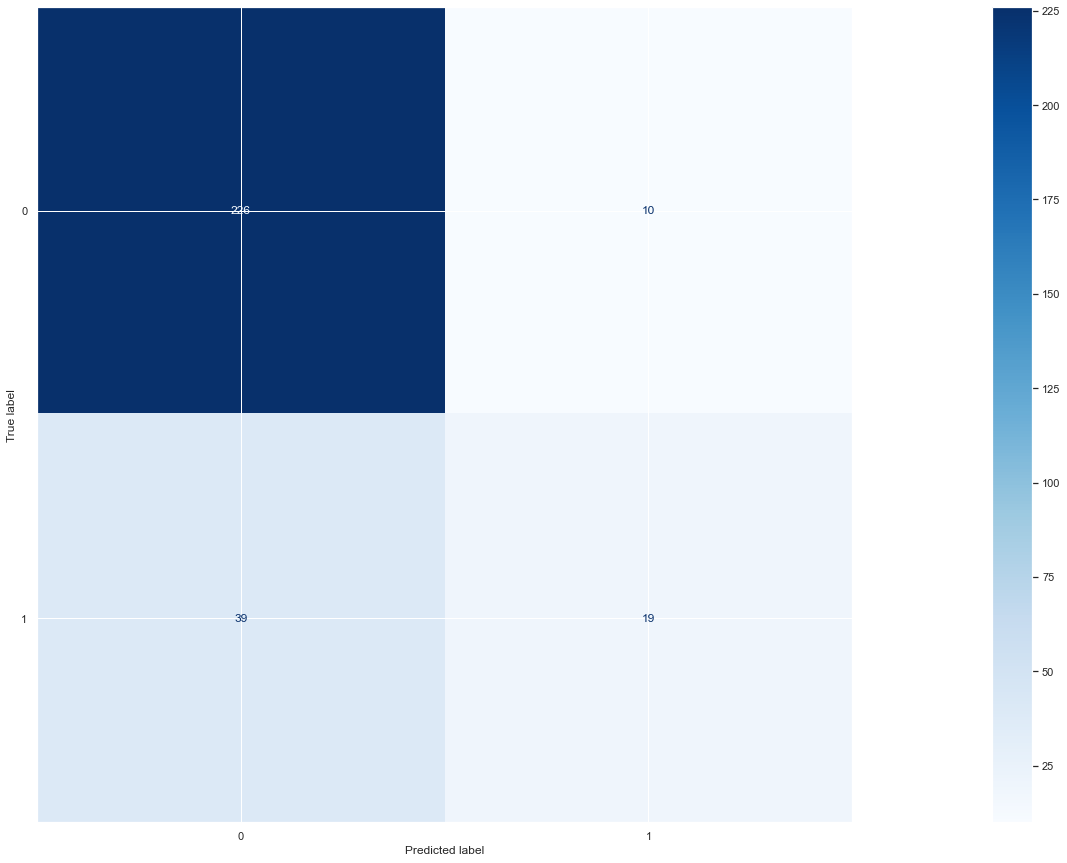

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

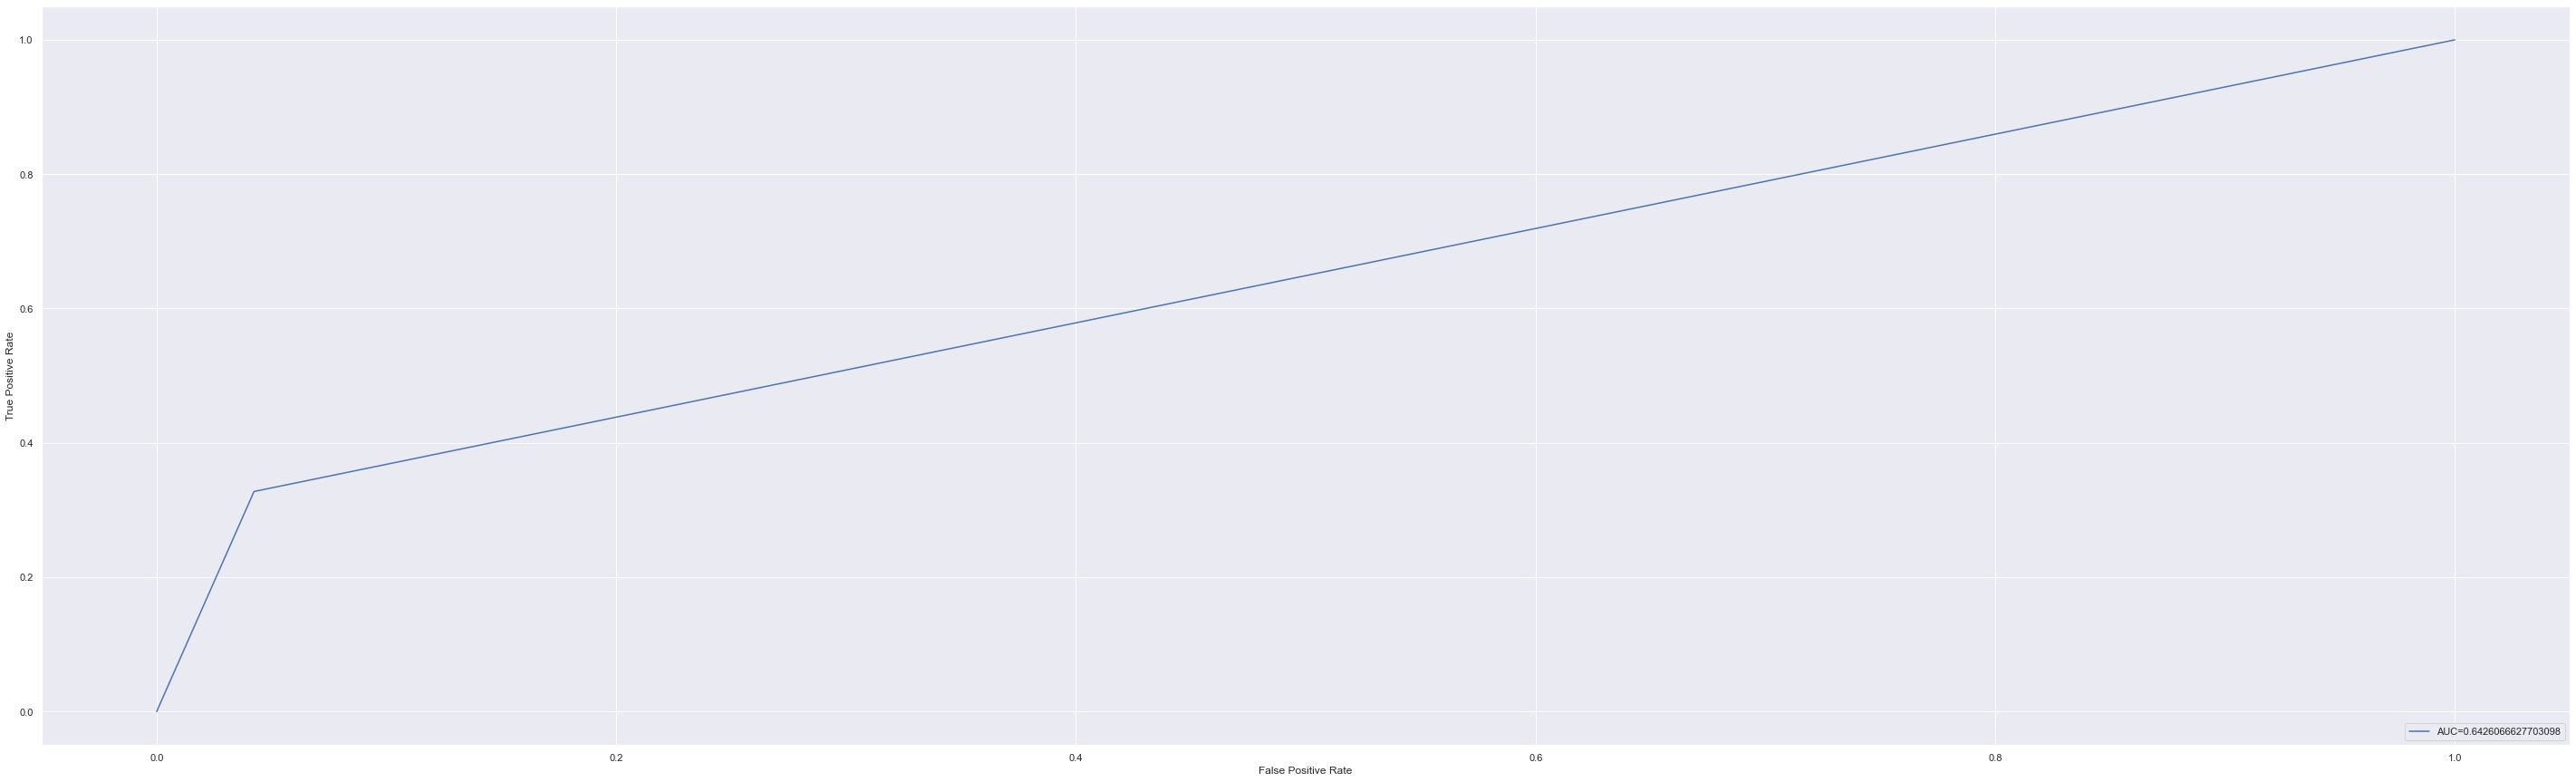

In [122]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [123]:
#Performing K-Fold cross-validation to evaluate the model better. Here, k = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = randomforest_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies for the 10-folds is {}".format(accuracies))
print("Accuracy is {}".format(accuracies.mean()*100))
print("Standard Deviation is {}".format(accuracies.std()*100))

Accuracies for the 10-folds is [0.86440678 0.8559322  0.88135593 0.86440678 0.86440678 0.87288136
 0.86324786 0.88034188 0.86324786 0.84615385]
Accuracy is 86.56381283499928
Standard Deviation is 1.0027620115213363


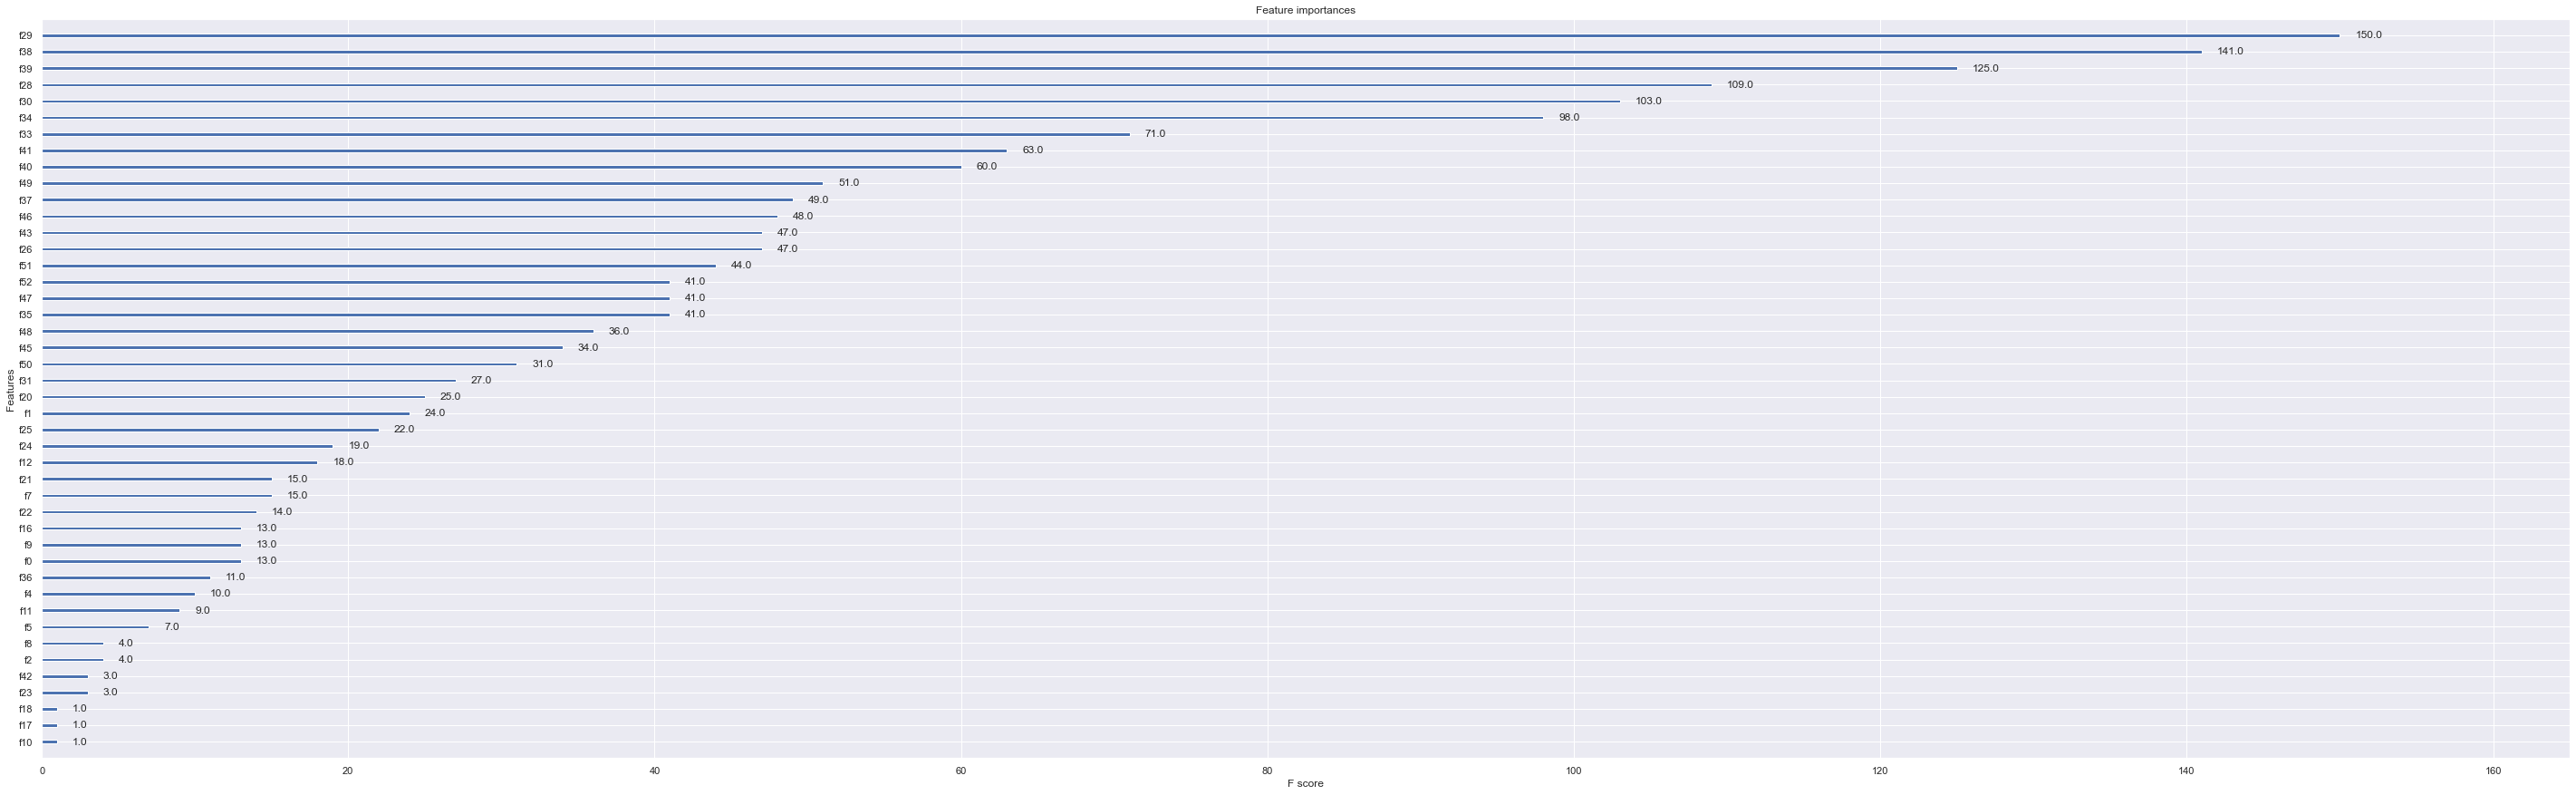

In [124]:
from xgboost import plot_importance

ax=plot_importance(xgb_classifier)
plt.title('Feature importances')
plt.show()

### Artificial Neural Networks 

In [125]:
tf.__version__

'2.11.0'

In [126]:
#Initialize the ANN
ann_classifier = tf.keras.models.Sequential()

#Add 3 Hidden layers with the desired number of neurons and the activation function
ann_classifier.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
ann_classifier.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))
ann_classifier.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

#Add the Output layer with the 1 neuron and the activation function
ann_classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [127]:
#Compile the ANN
ann_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Train the ANN on the training set
ann_classifier.fit(X_train, y_train, batch_size = 32, epochs = 160)

Epoch 1/160
37/37 [==============================] - 1s 1ms/step - loss: 0.6262 - accuracy: 0.6548
Epoch 2/160
37/37 [==============================] - 0s 1ms/step - loss: 0.4599 - accuracy: 0.8393
Epoch 3/160
37/37 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8478
Epoch 4/160
37/37 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8495
Epoch 5/160
37/37 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8554
Epoch 6/160
37/37 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8597
Epoch 7/160
37/37 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8656
Epoch 8/160
37/37 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8690
Epoch 9/160
37/37 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8724
Epoch 10/160
37/37 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8750
Epoch 11/

In [128]:
y_pred = ann_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 1ms/step


In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[205  31]
 [ 38  20]]


0.7653061224489796

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       236
           1       0.39      0.34      0.37        58

    accuracy                           0.77       294
   macro avg       0.62      0.61      0.61       294
weighted avg       0.75      0.77      0.76       294



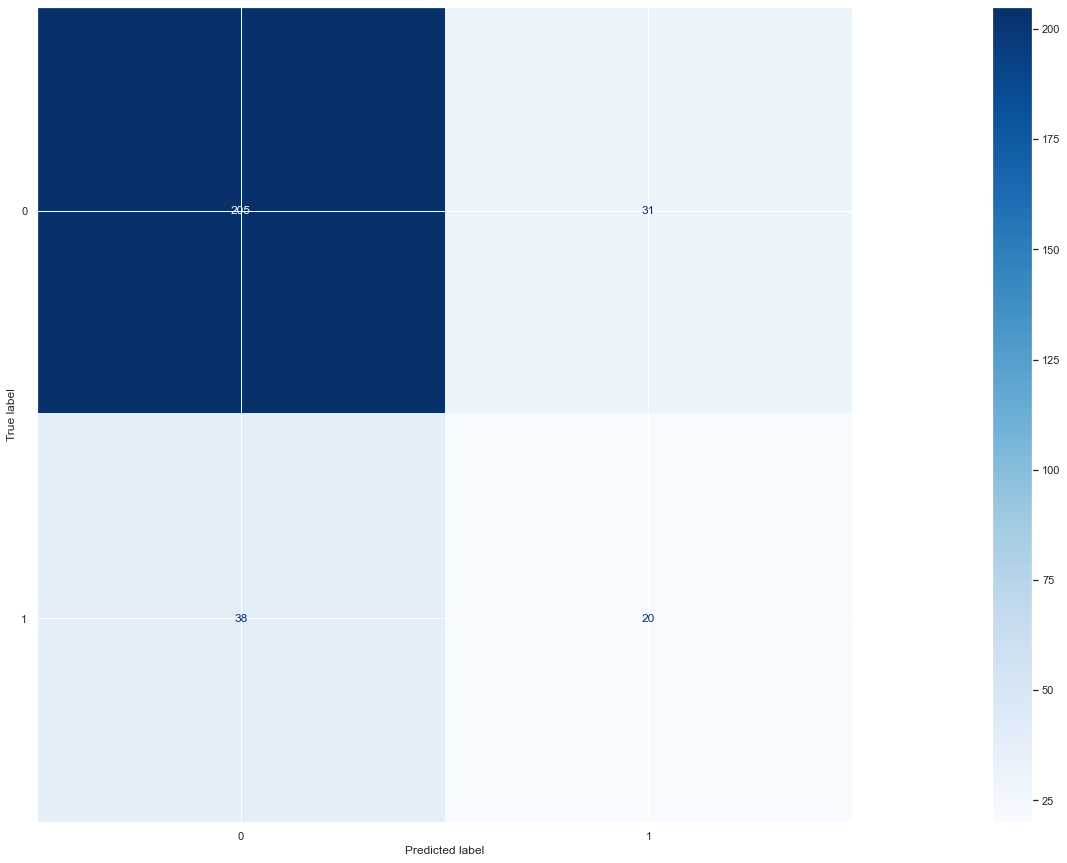

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues')

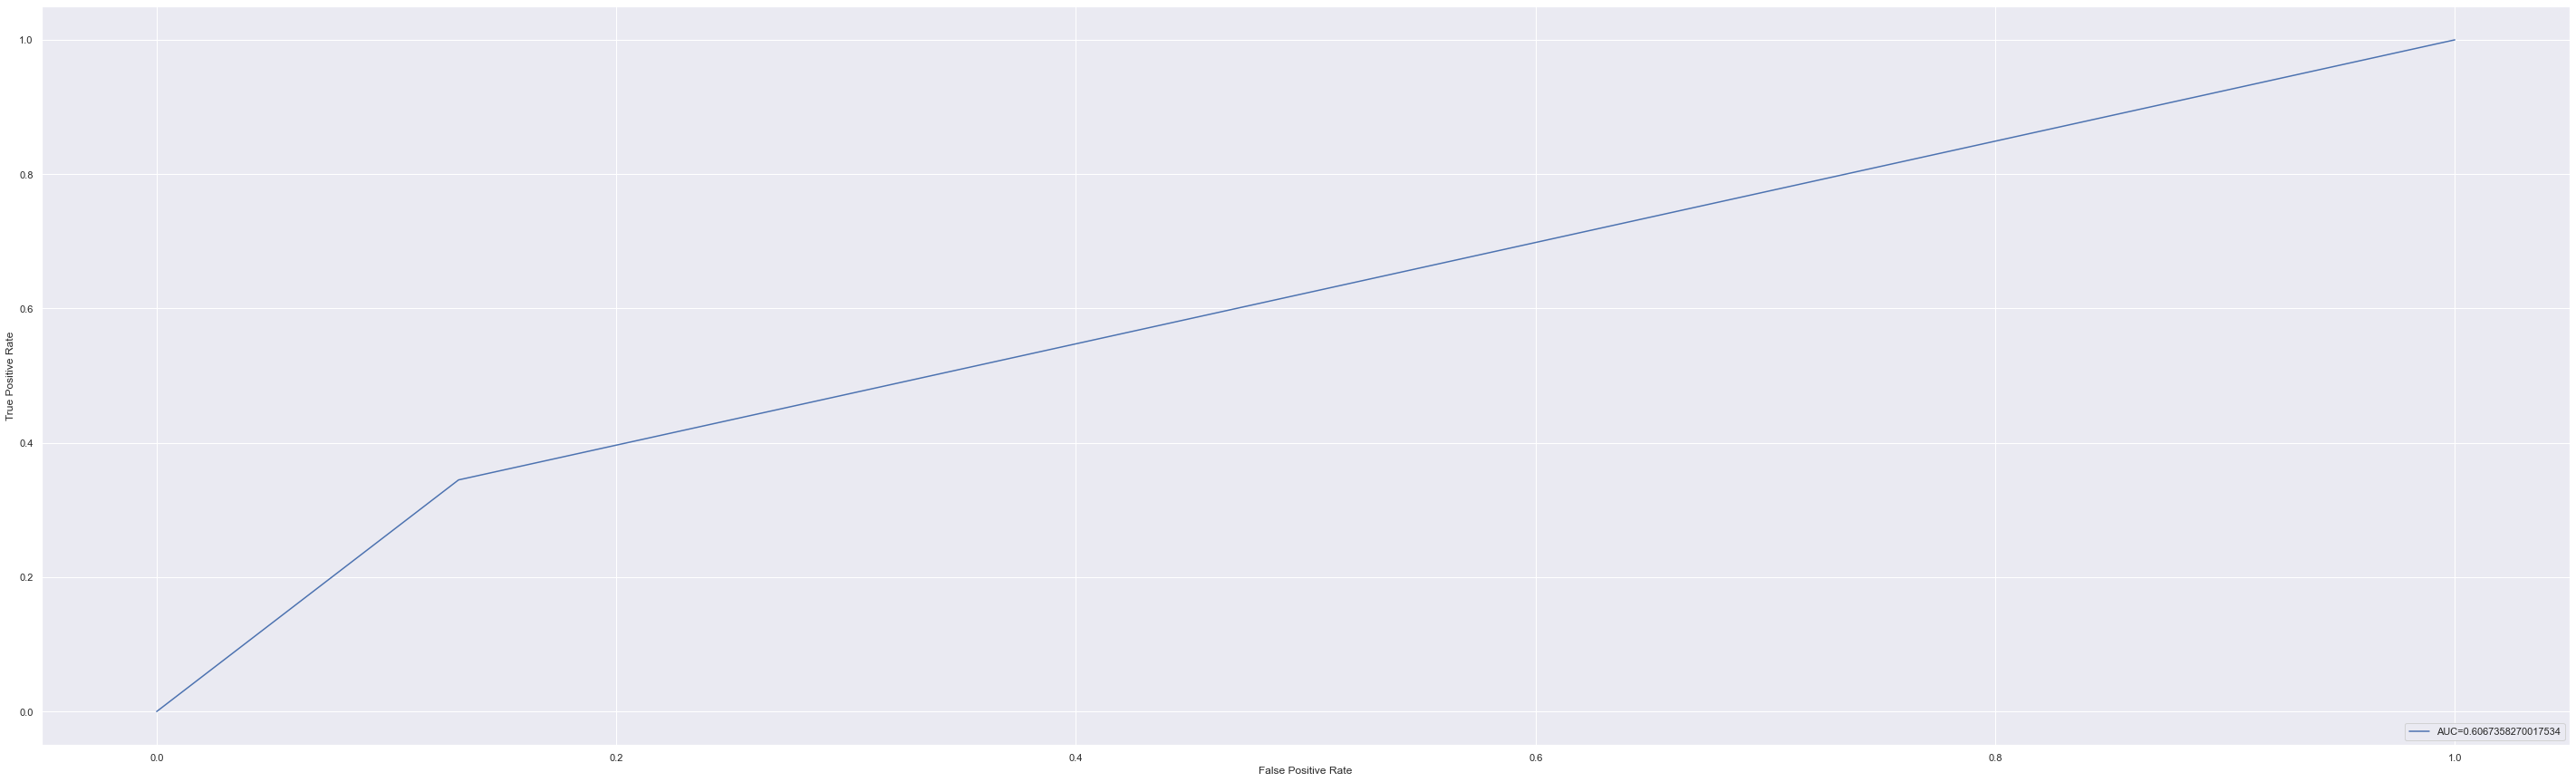

In [131]:
'''
Plotting the ROC and calulating the AUC.
The closer the Area Under Curve (AUC) to 1, the better the model performance is.
'''

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve and Calculate the AUC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [132]:
'''
Conclusion:

When compared to "Yes," the dataset has more values for "No" than for "Yes" for attrition. Even 
though the data is not entirely accurate, we were nevertheless able to achieve accuracy levels 
above 85%. Dimensionality reduction has also shown that the data are only partially linearly 
separable. As we can see from the aforementioned classification models, Logistic Regression, 
SVM and Kernel SVM, Random Forest, and XGBoost Classifier offer greater comparative 
accuracies. Since the mean accuracy of 10-fold cross-validation is near to that of the test 
accuracy, we employed the K-Fold cross-validation procedures to make sure we did not get 
fortunate with the accuracy computation.
We are hopeful that the employee churn projection supplied by our developed models would 
help HR in some way so that they can take the necessary actions to retain their personnel. The 
organization can use our methods to increase staff retention. It can be used to pre-plan the hiring 
of fresh resources. When the time comes to lay off workers as part of organizational changes, the 
corporation can use churn modeling to make a rational decision rather than selecting layoff 
candidates at random
'''


'\nConclusion:\n\nWhen compared to "Yes," the dataset has more values for "No" than for "Yes" for attrition. Even \nthough the data is not entirely accurate, we were nevertheless able to achieve accuracy levels \nabove 85%. Dimensionality reduction has also shown that the data are only partially linearly \nseparable. As we can see from the aforementioned classification models, Logistic Regression, \nSVM and Kernel SVM, Random Forest, and XGBoost Classifier offer greater comparative \naccuracies. Since the mean accuracy of 10-fold cross-validation is near to that of the test \naccuracy, we employed the K-Fold cross-validation procedures to make sure we did not get \nfortunate with the accuracy computation.\nWe are hopeful that the employee churn projection supplied by our developed models would \nhelp HR in some way so that they can take the necessary actions to retain their personnel. The \norganization can use our methods to increase staff retention. It can be used to pre-plan the hir